Name : Sandra Luyali

Course : DSFT_05

# Twitter Sentiment Analysis of Apple and Google Products: Biulding an NLP model to Drive Business Decisions.

# Step 1: Business Understanding

## Introduction

In the mordern world,social media has a significant impact not only on our personal lives but also on the daily functioning of businesses.With increased global connectivity it is essential for businesses to accurately gauge public sentiment regarding their products and brand and swiftly respond to evolving trends.This helps business maintain relevance and increase profits

This project aims to solve a real world problem by biulding an NLP model to analyze Twitter sentiments about Apple and Google products.This project will help companies gain insights into how customers are talking about their products and services on twitter and use those insights to drive business decisions.This is important since social media platforms like twitter have become a popular medium for customers to express their thoughts and feelings about products and services.Companies need to monitor these conversations to understand how customerss percieve their products and servies and use them to make informed business decisons.


## Stakeholders
The primary stakeholders for this project are companies that want to monitor brand reputation in real-time,improve customer satisfaction,identify potential product issues earlier on,establish how they are perceived and make informed decisons.
These stakeholders would use the project to analyze Twitter sentiment about Apple and Google products and gain insights into how customers are talking about their products and services on twitter.


## Conclusion
The impication of this project for the real-world problem and stakeholders are significant.It helps companies gain insights into how customers are talking about their products and services on twitter and use those insights to drive business decisions.This project can help companies:
1. Validating,improving and expanding the functionalities of a product by leveraging on text data
2. Make their business more responsive to customer feedback 
3. Keep customers happy by always putting their feelings first.
4. Identify product issues and PR crises early on,establish how they are perceived and use sentiment analysis to make informed business decisions.

By using the project's insights,companies can improve their products and services,increase customer satisfaction and ultimately drive business growth.


# Step 2: Data Understanding

## Data source and suitablitlity for the project
The data source being used for this project is a dataset from CrowdFlower via data.world.The dataset contains over 9000 tweets that have been rated by human raters as positive,negative or neither.The data source for the project is suitable because it contains tweets that have been rated by human raters as positive,negative or neither.This data is useful for training an NLP model to analyze Twitter sentiments about Apple and Google products.

## Size of the Dataset and the Descriptive Statistics for features used in the analysis
The dataset contains over 9000 tweets.The features used in the analysis include the text of the tweet,the sentiment rating(positive, negative, neutral) and the tokens(individual words)in the tweet.Descriptive statistics for these features can be generated to gain insights into the data.

##  Justification of feature inclusion
Thw features included in the analysis are relevant because they provide information about the sentiment of the tweet and the individual words used in the tweet.This information is useful for training an NLP model to analyze Twitter sentiments about Apple and Google products

## Limitation of the Data
One of the limitations of the data is that it only contains tweets about Apple and Google products.This may limit the generalizability of the NLP model to other products and services.
The data may contain noise and irrelevant information that needs to be removed during preprocessing to improve the accuracy of the NLP model.

# Step 3: Data Preparation

## Loading the dataset

In [24]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

run_gridsearches = False

In [25]:
# Load the dataset


df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin-1')
       

In [26]:
# Printing the first five rows of the dataset
df.head()

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

The column names are quite ambiguous.We can rename them to make it easy to interpret and read.

In [27]:
# Renaming the column names
df.columns = ['Tweet', 'Brand', 'Emotion']
df.head()

Tweet               Brand  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

            Emotion  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

Check for unique values from the Brand and Emotion column to see the different categories

In [28]:
# Checking for unique values in the Emotion column
df['Emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

For easy interpretability and readability we can shorten the values in the the emotion column

In [29]:
# Mapping the values in the 'Emotion' column of a Pandas DataFrame to new values based on dictionary
emotion_dict = {'Positive emotion': 'Positive', 'Negative emotion': 'Negative', 
                'No emotion toward brand or product': 'Neutral', 
                "I can't tell": 'Unknown'}
df['Emotion'] = df['Emotion'].map(emotion_dict)
df.head()

Tweet               Brand  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

    Emotion  
0  Negative  
1  Positive  
2  Positive  
3  Negative  
4  Positive

In [30]:
# Checking the value counts of the'Emotion' column
df['Emotion'].value_counts()

Neutral     5389
Positive    2978
Negative     570
Unknown      156
Name: Emotion, dtype: int64

In [31]:
#checking patterns of tweets with  in the 'unkown' emotion values 
pd.set_option("display.max_colwidth", 300)
df[df['Emotion']=='Unknown']

Tweet  \
90                                     Thanks to @mention for publishing the news of @mention new medical Apps at the #sxswi conf. blog {link} #sxsw #sxswh   
102                         ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow   
237                              Just what America needs. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
341                                                                          The queue at the Apple Store in Austin is FOUR blocks long. Crazy stuff! #sxsw   
368                                       Hope it's better than wave RT @mention Buzz is: Google's previewing a social networking platform at #SXSW: {link}   
...                                                                                                                                                     ...   
9020              It's funny watching a room full of people hold their iPad in the air to take a photo. Like a room full of tablets staring you down. #SXSW   
9032                                                                                    @mention yeah, we have @mention , Google has nothing on us :) #SXSW   
9037                                                                      @mention Yes, the Google presentation was not exactly what I was expecting. #sxsw   
9058  &quot;Do you know what Apple is really good at? Making you feel bad about your Xmas present!&quot; - Seth Meyers on iPad2 #sxsw #doyoureallyneedthat?   
9066                    How much you want to bet Apple is disproportionately stocking the #SXSW pop-up store with iPad 2? The influencer/hipsters thank you   

      Brand  Emotion  
90      NaN  Unknown  
102     NaN  Unknown  
237     NaN  Unknown  
341     NaN  Unknown  
368     NaN  Unknown  
...     ...      ...  
9020    NaN  Unknown  
9032    NaN  Unknown  
9037    NaN  Unknown  
9058    NaN  Unknown  
9066  Apple  Unknown  

[156 rows x 3 columns]

These tweets make approximately 1.3% of our data,we are gonna go ahead and drop them since we need to have labels for our data and these tweets will not be useful in developing our model.

In [32]:
#filters df based on conditions 
df = df[df['Emotion']!='Unknown']
df['Emotion'].value_counts()

Neutral     5389
Positive    2978
Negative     570
Name: Emotion, dtype: int64

## Checking for missing values

In [33]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missimg Values:\n", missing_values)

Missimg Values:
 Tweet         1
Brand      5655
Emotion       0
dtype: int64


## Handling missing values

Since "Tweet" is a text best column and only has one missing value we might consider dropping the row with the missing value because it is a small sample of the dataset and will not have a large impact.

In [34]:
df.dropna(subset=['Tweet'], inplace=True)

The "Brand" seems to be a categorical colum  and has a significant number of missing values(5802).Dropping all rows with missing values might lead to a substantial data loss.Lets take a close look at the  Brand column missing values.


In [35]:
df[df['Brand'].isna()].head()

Tweet  \
5   @teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd   
16                                                  Holler Gram for iPad on the iTunes App Store -  http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw   
32                                           Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. {link}   
33                                                                                                 Anyone at  #sxsw want to sell their old iPad?   
34                                                                 Anyone at  #SXSW who bought the new iPad want to sell their older iPad to me?   

   Brand  Emotion  
5    NaN  Neutral  
16   NaN  Neutral  
32   NaN  Neutral  
33   NaN  Neutral  
34   NaN  Neutral

These tweets are not directed towards a specific Brand hence we canfill the null values with 'Unkown' for now.

In [36]:
# Replacing null values with UnKown

df['Brand'].fillna('Unknown', inplace=True)

In [37]:
# Confirming if there are still missing values
missing_values = df.isnull().sum()
print("Missimg Values:\n", missing_values)

Missimg Values:
 Tweet      0
Brand      0
Emotion    0
dtype: int64


## Removing duplicates

In [38]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

## Text Cleaning

Text data often requires cleaning and preprocessing.Below we are removing special characters ,retweets mentions etc.This helps to improve text quality.

In [39]:
def clean_text(text):
    # remove mentions
    text = re.sub(r'@[A-Za z0-9]+', '', text)
    # remove hashtags
    text = re.sub(r'#', '', text)
    # remove retweets
    text = re.sub(r'RT[\s]+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/S+', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # convert to lowercase
    text = text.lower()
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text

df['clean_text'] = df['Tweet'].apply(clean_text)

In [40]:
#checking to see if the text has been cleaned
clean_text_df = pd.DataFrame(df['clean_text'])
print(clean_text_df.head(500))

                                                                                                                                     clean_text
0                       .@wesley i have a g iphone. after hrs tweeting at rise_austin, it was dead! i need to upgrade. plugin stations at sxsw.
1    @jessedee know about @fludapp ? awesome ipad/iphone app that you'll likely appreciate for its design. also, they're giving free ts at sxsw
2                                                                   @swonderlin can not wait for ipad also. they should sale them down at sxsw.
3                                                             @sxsw i hope this year's festival isn't as crashy as this year's iphone app. sxsw
4            @sxtxstate great stuff on fri sxsw: marissa mayer (google), tim o'reilly (tech books/conferences) &amp; matt mullenweg (wordpress)
..                                                                                                                                      

# STEP 5: EXPLORATORY DATA  ANALYSIS

Exploratory Data Analysis  involves examining and summarizing the main characteristics,patterns and insights in a dataset.Having identified the business problem we will start by analyzing positive tweets then negative tweets and the Brands.

## Positive Sentiment Tweets

In [41]:
#parsing positive tweets into new df
df_positive = df[df['Emotion']=='Positive']
#counting positive emotion
df_positive['Emotion'].value_counts()

Positive    2970
Name: Emotion, dtype: int64

In [42]:
#Extracting values from the 'Tweet' column and converting to a Python list
corpus_pus = df_positive['Tweet'].to_list()
corpus_pus[:5]

["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB']

## Tokenization

We will be using 'TweetTokenizer' to breakdown or split the text of tweets into smaller units like words or phrases.This tokenizer is designed specifically for processing text from social media platforms like Twitter and has some handy features.

In [43]:
from nltk import TweetTokenizer
import string
# using functions to tokenize tweets
def tokenize_tweets(corpus, preserve_case=False, strip_handles=True):
    """Function returns tokens based on a corpus passed in. The corpus will be broken 
    down into tokens based on TweetTokenizer from the nltk package.
    -------------------------------
    Arguments:
    corpus: the collection of words to be tokenized in a corpus format.
    preserve_case: whether to keep the upper case letters in the words as upper case
    stip_handles: whether to remove twitter handles"""
    
    tokenizer = TweetTokenizer(preserve_case=preserve_case, 
                               strip_handles=strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens

In [44]:
#tokenize positive tweets for further analysis
tokens_positive = tokenize_tweets(corpus_pus)

In [45]:
# Displaying list of 15 most common tokens in positive tweets and their frequency count
from nltk import FreqDist
freq = FreqDist(tokens_positive)
freq.most_common(15)


[(',', 4050),
 ('#sxsw', 2983),
 ('.', 2230),
 ('the', 1590),
 ('!', 1241),
 ('link', 1214),
 ('{', 1210),
 ('}', 1210),
 ('to', 1154),
 ('at', 1019),
 ('ipad', 1010),
 ('rt', 931),
 ('for', 906),
 ('a', 790),
 ('apple', 710)]

## Lemmatization
Lemmatizing is the process of reducing words to their base root form
We will be lemmatizing the tokens to make sure we are capturing any stop words that may be generated in the process.This improves text analysis and information retrieval.

In [46]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
#functionize lemmatization of tokens
def lemmatize_tokens(tokens_list):
    """Function lemmatizes tokens list that is passed in by using 
    WordNetLemmatizer and returns lemmatized tokens.
    -------------------------------
    Arguments:
    tokens_list: a tokens list
    """
    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(word) for word in tokens_list]
    return tokens_lemm

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
#Lemmatizing positive tweet tokens
tokens_positive_lemm = lemmatize_tokens(tokens_positive)

In [48]:
#displaying 10 most common tokens
from nltk import FreqDist
freq = FreqDist(tokens_positive_lemm)
freq.most_common(15)

[(',', 4050),
 ('#sxsw', 2983),
 ('.', 2230),
 ('the', 1590),
 ('!', 1241),
 ('link', 1218),
 ('{', 1210),
 ('}', 1210),
 ('to', 1154),
 ('at', 1019),
 ('ipad', 1010),
 ('rt', 931),
 ('for', 906),
 ('a', 864),
 ('apple', 711)]

From above we can tell we still have punctuations and stopwords(words often considered insignificant) in our list.
Since they do not reveal anything of importance about the sentiments of tweets we can remove them.

In [49]:
# Getting rid of stopwords and punctuations
from nltk.corpus import stopwords
stop_word_lst = stopwords.words('english')
stop_word_lst += list(string.punctuation)
#adding additional characters and empty string to stopwords
additional_char = ['“','”','...',"''",'’','``','']
stop_word_lst += additional_char

In [50]:
#function for removal of the stopwords
def remove_stop (tokens, stop_list=stop_word_lst):
    """Function removes stop words from a given tokens list based on a 
    stop word list.
    -------------------------------
    Arguments:
    tokens: a tokens list
    stop_list: a list containing stop words to be removed from tokens"""
    
    #encoding/decoding tokens to eliminate unrecognized symbols and 
    #eliminating external links
    tokens_stopped = [word.encode('ascii','ignore').decode() 
                      for word in tokens 
                      if (word not in stop_list) & 
                      (word.startswith('http') == False)]
    
    return tokens_stopped
    

In [51]:
# removing stopwords from lemmatized tokens
tokens_positive_list = remove_stop(tokens_positive_lemm)

In [52]:
#displaying most common tokens
freq = FreqDist(tokens_positive_list)
freq.most_common(60)

[('#sxsw', 2983),
 ('link', 1218),
 ('ipad', 1010),
 ('rt', 931),
 ('apple', 711),
 ('google', 602),
 ('2', 595),
 ('store', 554),
 ('iphone', 466),
 ('', 443),
 ('app', 387),
 ('new', 358),
 ('austin', 250),
 ('get', 181),
 ('#apple', 174),
 ('launch', 173),
 ('android', 161),
 ('party', 151),
 ('pop-up', 151),
 ('sxsw', 144),
 ('line', 143),
 ('time', 136),
 ('great', 135),
 ('via', 132),
 ('#ipad2', 129),
 ('day', 124),
 ('social', 122),
 ('free', 120),
 ('cool', 119),
 ("i'm", 115),
 ('like', 115),
 ('map', 115),
 ('one', 114),
 ('win', 112),
 ('today', 111),
 ('ha', 108),
 ('circle', 107),
 ('w', 104),
 ('go', 104),
 ('come', 103),
 ('wa', 100),
 ('#sxswi', 96),
 ('awesome', 93),
 ('#ipad', 93),
 ('love', 93),
 ('good', 92),
 ('network', 91),
 ('mobile', 90),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('people', 82),
 ('open', 82),
 ('#iphone', 82),
 ('got', 81),
 ('apps', 78),
 ('check', 77),
 ('u', 76),
 ('popup', 76),
 ('see', 75)]

From the above list we can tell that some words are not providing useful information about the tweet sentiments.For example #sxsw is irrelevant,rt for retweets are also irrelevent since we want to deal with an original feedback,links are also not relevant
We are going to add them in the stop word list then remove them.

In [53]:
# Adding irrelevant words to the stopwords list
stop_word_lst +=['#sxsw','link','rt','sxsw''sxswi']
# Updating the token list with updated stopword list
tokens_positive_list = remove_stop(tokens_positive_list, stop_list=stop_word_lst)


Next step of exploring the data is that we are going to look at the most frequent words

In [54]:
# defining a function going to find n most common tokens
def find_frequent(tokens, n=70):
    """Function returns the n most common words along with their frequencies 
    based on a tokens list passed in.
    -------------------------------
    Arguments:
    tokens: a tokens list
    n: number of top words to be returned"""
    
    freq = FreqDist(tokens)
    display(freq.most_common(n))

In [55]:
# displaying 70 most frequent words
find_frequent(tokens_positive_list)

[('ipad', 1010),
 ('apple', 711),
 ('google', 602),
 ('2', 595),
 ('store', 554),
 ('iphone', 466),
 ('app', 387),
 ('new', 358),
 ('austin', 250),
 ('get', 181),
 ('#apple', 174),
 ('launch', 173),
 ('android', 161),
 ('party', 151),
 ('pop-up', 151),
 ('sxsw', 144),
 ('line', 143),
 ('time', 136),
 ('great', 135),
 ('via', 132),
 ('#ipad2', 129),
 ('day', 124),
 ('social', 122),
 ('free', 120),
 ('cool', 119),
 ("i'm", 115),
 ('like', 115),
 ('map', 115),
 ('one', 114),
 ('win', 112),
 ('today', 111),
 ('ha', 108),
 ('circle', 107),
 ('w', 104),
 ('go', 104),
 ('come', 103),
 ('wa', 100),
 ('#sxswi', 96),
 ('awesome', 93),
 ('#ipad', 93),
 ('love', 93),
 ('good', 92),
 ('network', 91),
 ('mobile', 90),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('people', 82),
 ('open', 82),
 ('#iphone', 82),
 ('got', 81),
 ('apps', 78),
 ('check', 77),
 ('u', 76),
 ('popup', 76),
 ('see', 75),
 ('thanks', 70),
 ('even', 70),
 ('#google', 69),
 ('going', 67),
 ('year', 66),
 ('mayer', 

From above we can tell that most common words are 'apple' and 'google' but there are other additional words that also show people's interest.
Since we are limited to the number of words being used we can visualize this information for better clarity.

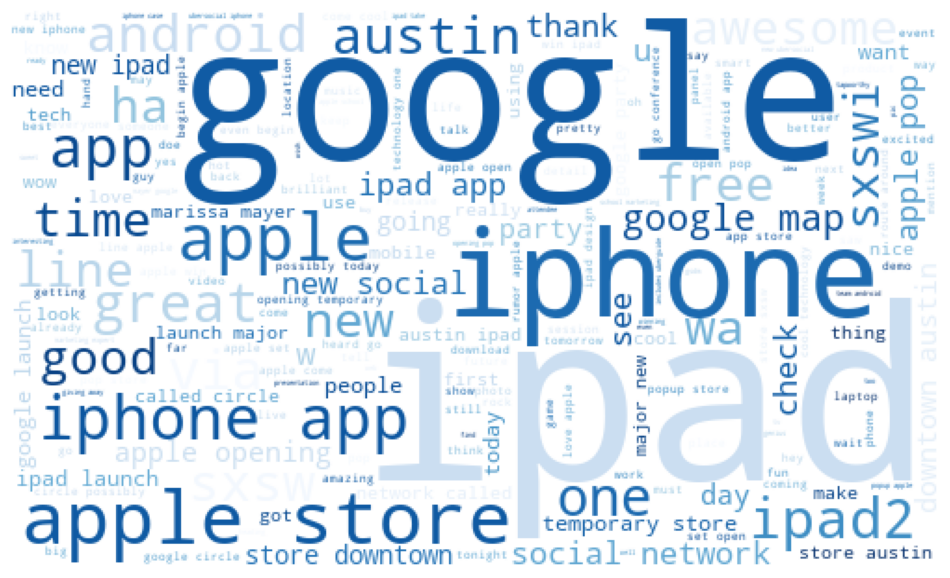

In [56]:
#word cloud with Brand information for positive tweet
from wordcloud import WordCloud

#defining a function for wordcloud generation
def generate_wordcloud(tokens, collocations=False, background_color='white', 
                       colormap='Blues', display=True):
    
    """Function generates and returns a wordcloud based on a tokens list passed in.
    -------------------------------
    Arguments:
    tokens: a tokens list
    collocations: Whether to include collocations (bigrams) of two words
    background_color: background color of the resulting word cloud
    colormap: the color map for the words that will be in the word cloud
    display: Whether to show the resulting wordcloud"""
    
    ## Initalize a WordCloud
    wordcloud = WordCloud(collocations=collocations, 
                          background_color=background_color, 
                          colormap=colormap, 
                          width=500, height=300)

    ## Generate wordcloud from tokens
    wordcloud.generate(','.join(tokens))

    ## Plot with matplotlib
    if display:
        plt.figure(figsize = (12, 15), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis('off');
    return wordcloud
#generating word cloud
cloud_pos_w_company = generate_wordcloud(tokens_positive_list, collocations=True)



This is the most apprporiate visualization since it can be seen easily unlike in a bar plot where they would overlap.
From the visualization we can tell that people are tweeting about googe and Apple,they also seem excited about ipad and ipad 2 launch.It also seems that people were excited about the apple store and also being in Austin.

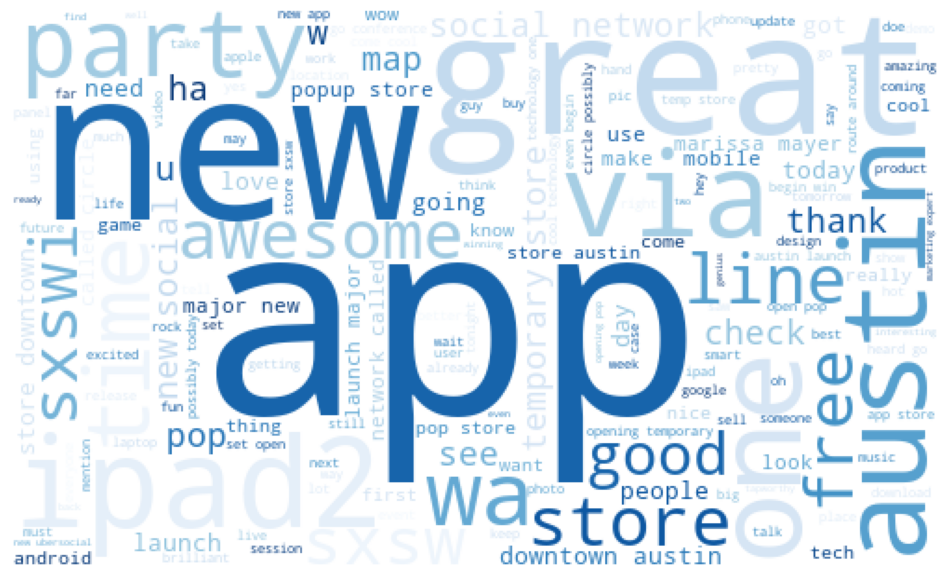

In [57]:
#wordcloud without Brand Information for Positive Tweets
stop_word_lst_no_brand = stop_word_lst + ['ipad', 'apple', 'google', 'iphone', '#apple', 
                                          '#google', '#ipad', '#iphone', 'android']
tokens_positive_list = remove_stop(tokens_positive_list, stop_list=stop_word_lst_no_brand)
#generating a wordcloud
cloud_pos_wo_company = generate_wordcloud(tokens_positive_list, collocations=True)

## Negative Sentiment Tweets

In [58]:
#parsing negative tweets to a new df
df_negative = df[df['Emotion']=='Negative']
#counting the number of negative emotion
df_negative['Emotion'].value_counts()

Negative    569
Name: Emotion, dtype: int64

In [59]:
#parsing tweets to a list
corpus_negative = df_negative['Tweet'].to_list()
corpus_negative[:5]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 '@mention  - False Alarm: Google Circles Not Coming Now\x89ÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW',
 'Again? RT @mention Line at the Apple store is insane.. #sxsw']

## Tokenization

In [60]:
# Tokenization of negative tweets to small units called tokens
tokens_negative = tokenize_tweets(corpus_negative)

## Lemmatization

In [61]:
#lemmatization of negative tweets to their base root form
tokens_negative_lemm = lemmatize_tokens(tokens_negative)

## Removal of Stop Word

In [62]:
#removal of stop words and punctuation using similar stop word list
tokens_negative_list = remove_stop(tokens_negative_lemm, stop_list=stop_word_lst)

## Most Frequent Words in Negative Tweets

In [63]:
find_frequent(tokens_negative_list)

[('ipad', 179),
 ('iphone', 145),
 ('google', 136),
 ('apple', 100),
 ('2', 81),
 ('', 69),
 ('app', 60),
 ('store', 47),
 ('new', 43),
 ('like', 43),
 ('need', 35),
 ('ha', 31),
 ('circle', 29),
 ('design', 29),
 ('people', 29),
 ('social', 28),
 ('apps', 26),
 ('get', 25),
 ('wa', 24),
 ('austin', 23),
 ('think', 23),
 ('time', 23),
 ('launch', 22),
 ('one', 22),
 ('day', 21),
 ('today', 21),
 ('look', 21),
 ('line', 20),
 ('say', 20),
 ('android', 19),
 ('#ipad', 19),
 ('would', 19),
 ('network', 18),
 ('phone', 18),
 ('headache', 17),
 ('news', 17),
 ('go', 17),
 ('long', 17),
 ('product', 17),
 ("i've", 16),
 ("i'm", 16),
 ('battery', 16),
 ('user', 15),
 ('thing', 15),
 ('#apple', 15),
 ('good', 15),
 ('see', 15),
 ('much', 15),
 ('company', 15),
 ('america', 15),
 ('sxsw', 14),
 ('money', 14),
 ('major', 14),
 ('really', 14),
 ('via', 14),
 ('fascist', 14),
 ('way', 14),
 ('talk', 14),
 ('take', 14),
 ('#google', 13),
 ('going', 13),
 ('year', 13),
 ('back', 13),
 ('v', 13),
 ('

We can tell that apple and google are also being mentioned quite a few times in the negative tweet.Other words like new,design and launch are being mentioned.We can visualize using a word cloud and dig deeper.

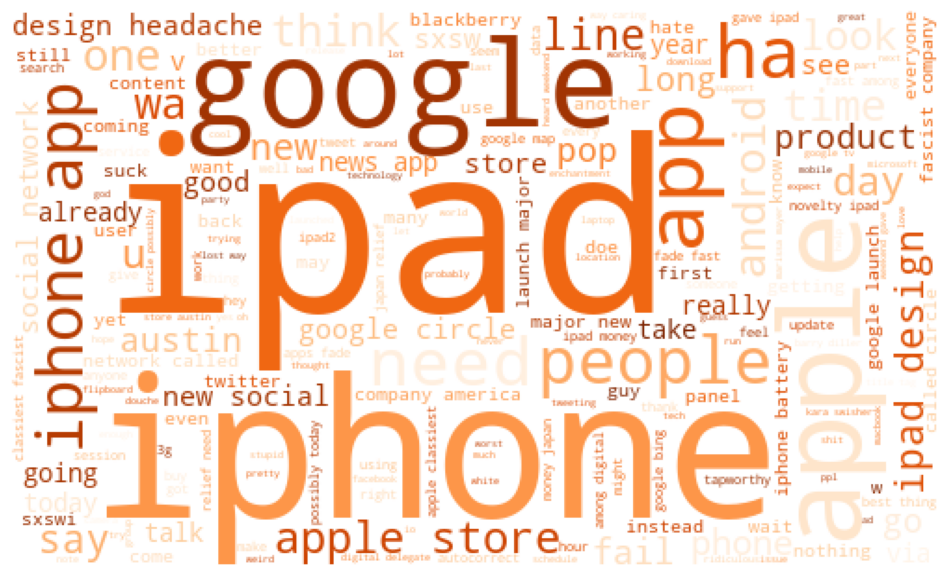

In [64]:
#generating a word cloud Brand with for negative tweets
cloud_neg_w_company = generate_wordcloud(tokens_negative_list, colormap='Oranges',
                                         collocations=True)

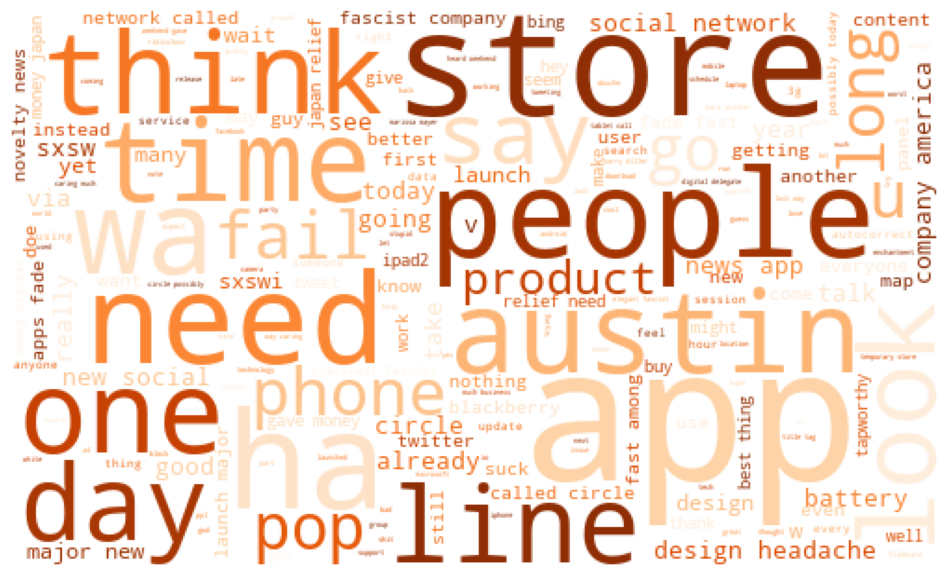

In [65]:
#generating a word cloud without Brand for negative tweets
tokens_negative_list = remove_stop(tokens_negative_list, stop_list=stop_word_lst_no_brand)
#generating word cloud
cloud_neg_wo_company = generate_wordcloud(tokens_negative_list, colormap='Oranges',
                                          collocations=True)

Ipad and iphone are being mentioned along with their design based on the above visualization.Google and Android is also visible.We can also see app and opinions being shared with words like think and fail

## Positive and Negative Tweets Comparison

Easier comparison is made when the wordclouds are generated side by side.It makes it easier to compare patterns or differences in the word frequencies and distribution.

In [66]:
def compare_wordclouds(wc1, wc2):
    """Function plots two wordclouds side-by-side for easy comparison
    -------------------------------
    Arguments:
    wc1: first wordcloud to be plotted
    wc2: second wordcloud to be plotted"""
    fig, ax = plt.subplots(figsize=(30,20), ncols=2)
    ax[0].imshow(wc1)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].imshow(wc2)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.tight_layout();


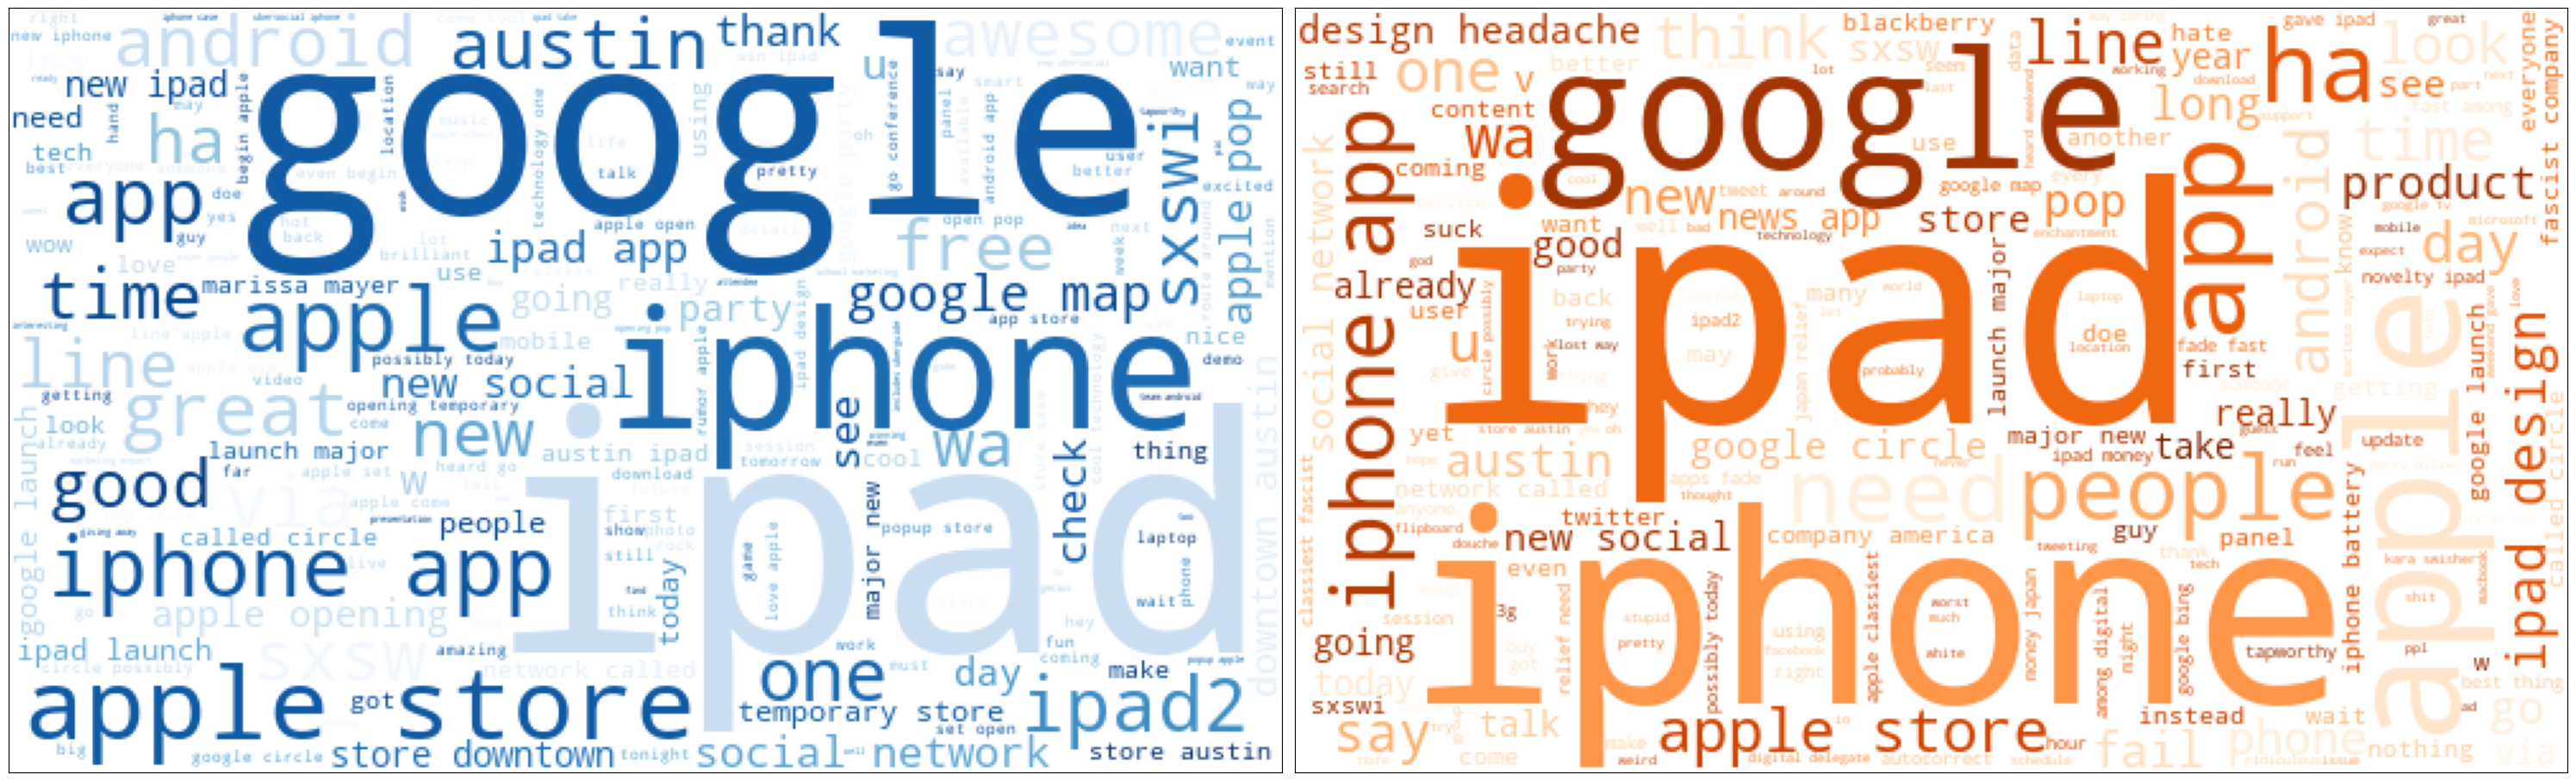

In [67]:
#comparison with Brand information
compare_wordclouds(cloud_pos_w_company, cloud_neg_w_company)


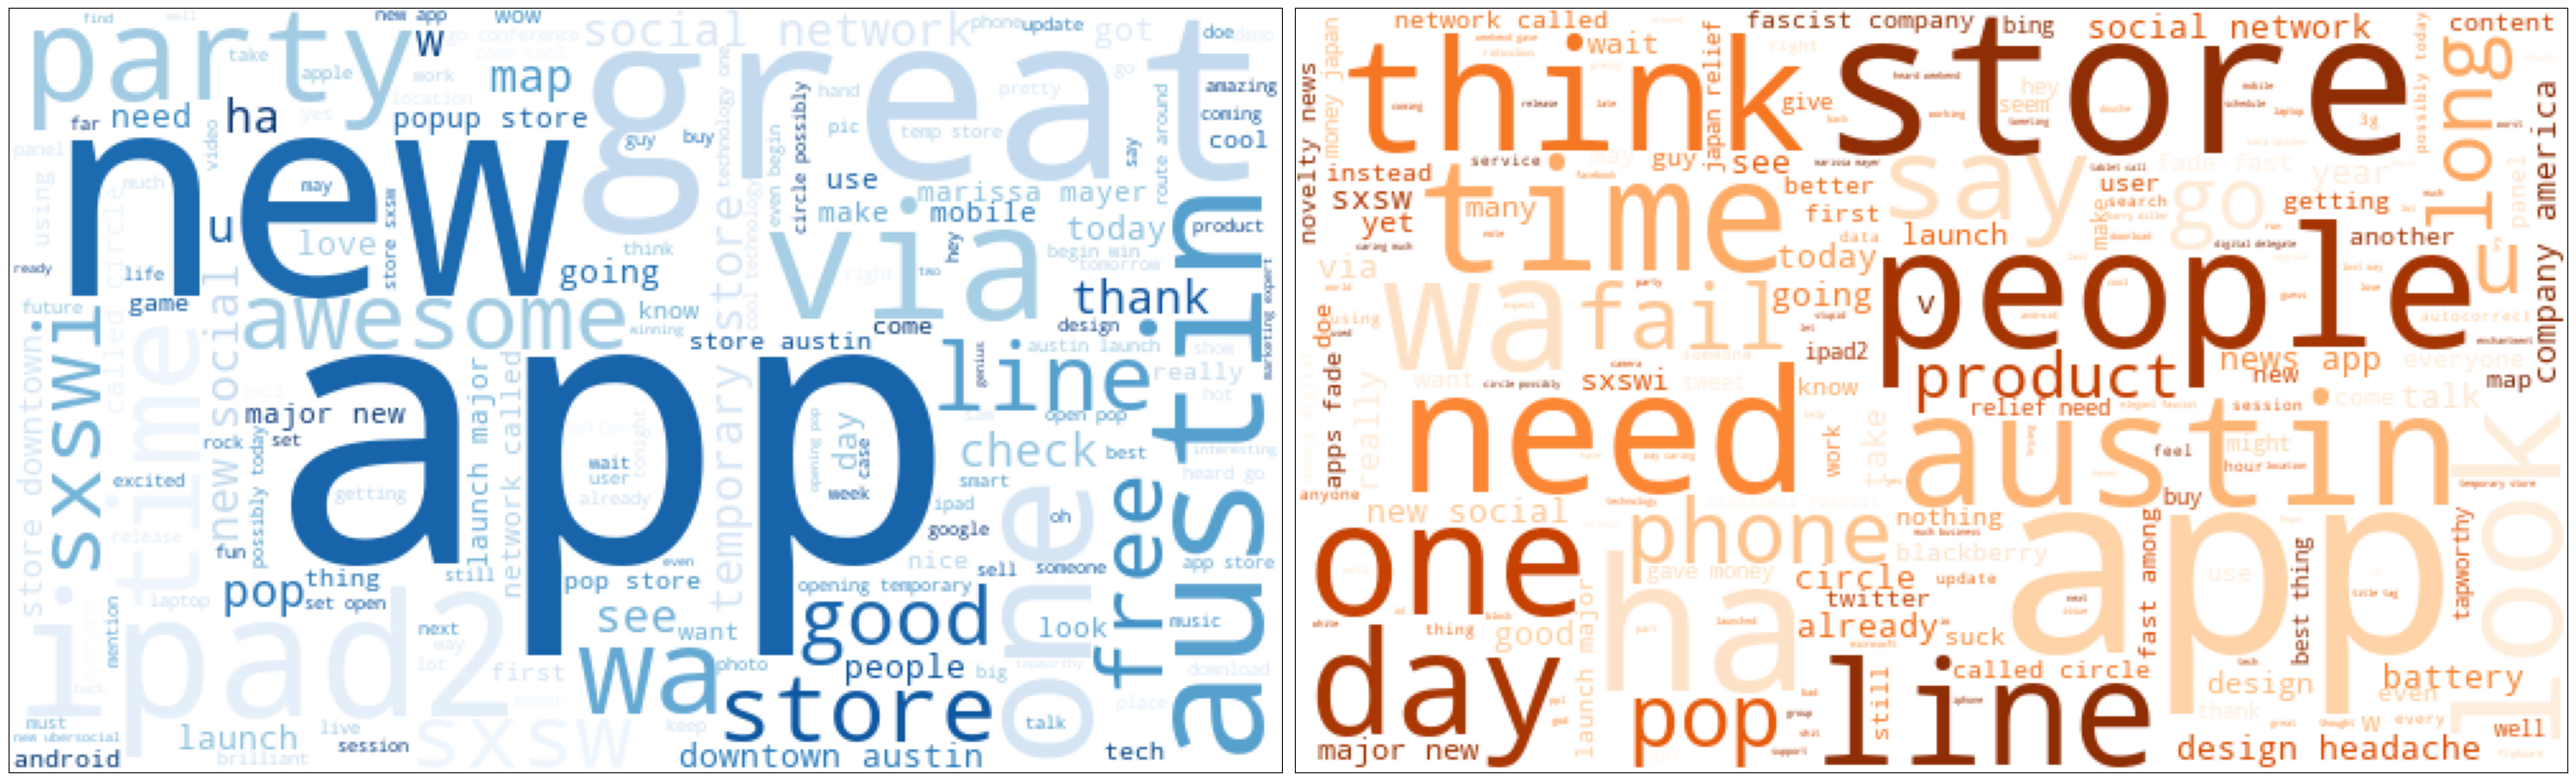

In [68]:
#comparison without Brand information
compare_wordclouds(cloud_pos_wo_company, cloud_neg_wo_company)

From above we can see that both apple and google as well as their products are mentioned in-depth in both positive and negative tweets.The wordcloud is a good starting point but it is difficult to extract any specific insights about the Brands based on these.To answer the business problem in the introduction section we will make our analysis more detailed and look at tweets not only based on their sentiments but also on specific brands 

## Apple Tweets

### Feature Engineering Brand Column

To find tweets only related to apple we can create a new column that can show what company the tweet was about.This can be achieved by using the brand column and map the products to their respective companies.

In [69]:
df['Brand'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [70]:
#mapping to specific brands
Brand_dict = {'iphone':'Apple', 'ipad or iphone App': 'Apple', 'ipad':'Apple',
              'Google':'Google', 'nan': 'nan', 'Android': 'Google', 'Apple': 'Apple', 'Android App':'Google', 'Other Google products or services': 'Google', 'Other Apple product or service': 'Apple'}
df['Brand'] = df['Brand'].map(Brand_dict)
df['Brand'].unique()

array([nan, 'Google', 'Apple'], dtype=object)

In [71]:
# filter row of a df based on Brand column equal to Apple
df_apple = df[df['Brand']=='Apple']
corpus_apple = df_apple['Tweet'].to_list()

In [72]:
#tokenize,lemmatize and remove stopwords and punctutaion using the same stop word list
tokens_apple = tokenize_tweets(corpus_apple)
tokens_apple_lemm = lemmatize_tokens(tokens_apple)
tokens_apple_list = remove_stop(tokens_apple_lemm, stop_list=stop_word_lst)
                                     

## Generating wordcloud with apple Brand

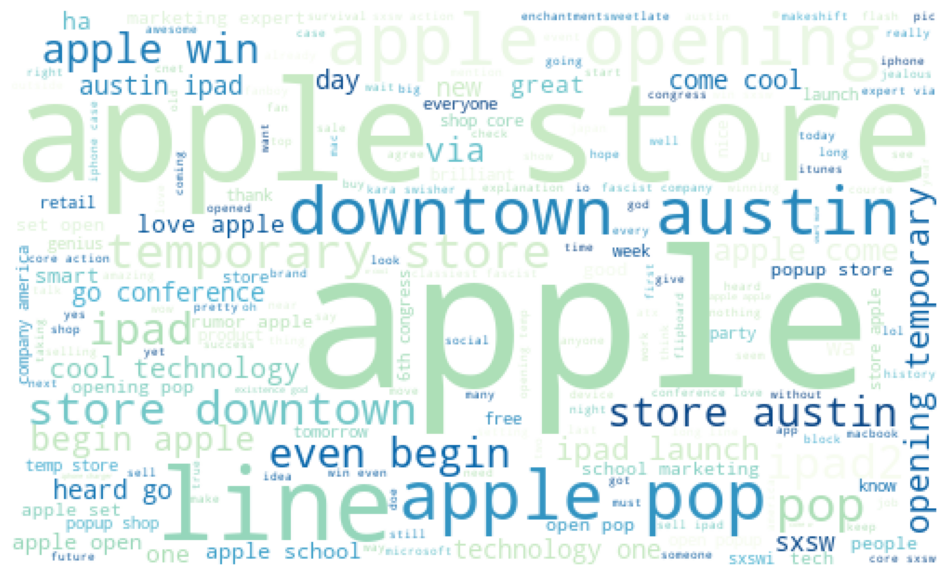

In [73]:
generate_wordcloud(tokens_apple_list, colormap='GnBu', collocations=True)

## Generating a word cloud without Brand Information


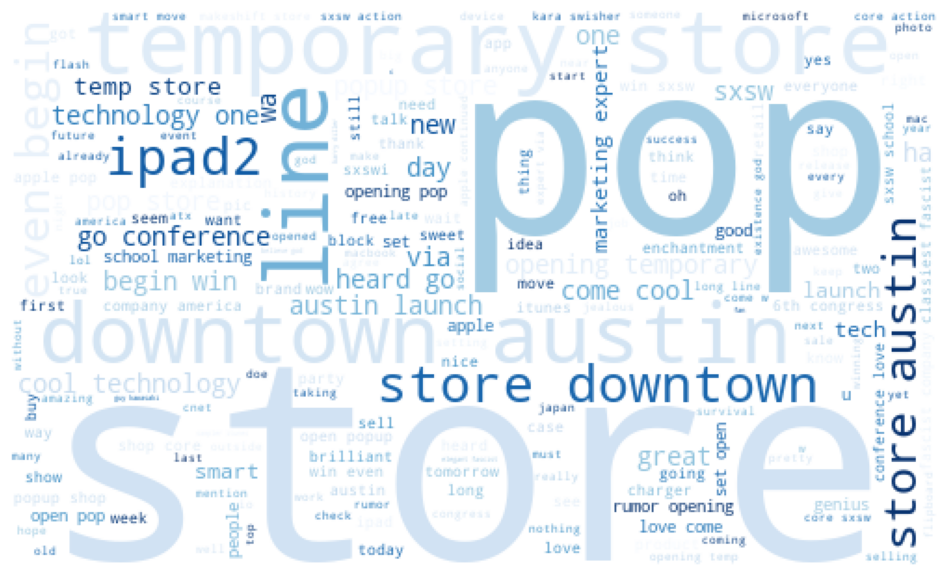

In [74]:
tokens_apple_ls = remove_stop(tokens_apple_list, stop_list = stop_word_lst_no_brand)
generate_wordcloud(tokens_apple_ls, colormap='Blues', collocations=True)

## Percentage of Positive,Negative and Neutral Sentiments on Apple Products

It is a good way of telling which category did the Brand had most mentions.

In [75]:
df_apple_sentiment = pd.DataFrame(df_apple['Emotion'].value_counts(normalize=True)).reset_index()
df_apple_sentiment.columns=['Emotion', 'Percentage']
display(df_apple_sentiment)
df_apple_sentiment.sort_values('Percentage', ascending=True, inplace=True)

Emotion  Percentage
0  Positive    0.828035
1  Negative    0.140173
2   Neutral    0.031792

Text(0.5, 1.0, 'Apple Percentage sentiment')

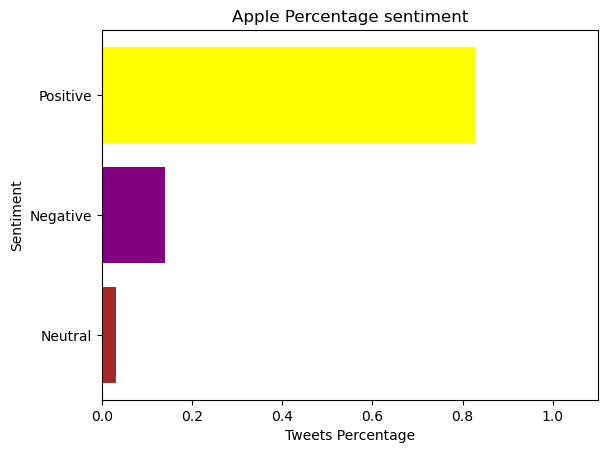

In [76]:
#generating a bar plot for better visualization
fig, ax = plt.subplots()
ax.barh(df_apple_sentiment['Emotion'], df_apple_sentiment['Percentage'],
        color=[ 'brown', 'purple',  'yellow'])
ax.set_xlim(0, 1.1)
ax.set_xlabel('Tweets Percentage')
ax.set_ylabel('Sentiment')
ax.set_title('Apple Percentage sentiment')

Basing on the above plot we can tell thart most tweets connected to Apple were positive which had the highest percentage of (82.5%) followed by negative which was (13.9%) and neutral which was(3.1%).The Unkown (0.2%) which has no impact whatsoever.This is an overall indication that the view of Apple and its products are positive.However this cannot be helpful on areas of improvement or getting to know what the people like the most about Apple products.For better understanding we can conduct on a product/service level under Apple.

## Sentiment Analysis on Apple Products

In [77]:
#defining function that generates product wordclouds based on company and emotion
def generate_product_wordcloud(company, emotion, stop_lst, colormap='Greens'):
    """Function generates wordclouds for products/services of a specified company and emotion. 
    The wordcloud objects and the figure showing the wordclouds are returned respectively.
    -------------------------------
    Arguments:
    company: company that the wordcloud will be isolating
    emotion: emotion of tweets that the wordcloud will be based on
    stop_lst: a list containing stop words to be removed from tokens"""
    
    company_df = df[df['Brand']==company]
    final_df = company_df[company_df['Emotion']==emotion]
    product_lst = list(final_df['Brand'].unique())
    
    wordclouds={}
    
    for product in product_lst:
        token_df = final_df[final_df['Brand']==product]
        corpus = token_df['Tweet'].to_list()
        #tokenize tweets
        tokens_company = tokenize_tweets(corpus)
        #lemmatize tweets
        tokens_company_lemm = lemmatize_tokens(tokens_company)
        #remove stop words & punctuation using the same stop words list
        tokens_company_ls = remove_stop(tokens_company_lemm, 
                                        stop_list = stop_lst)
        wordclouds[product] = generate_wordcloud(tokens_company_ls, 
                                                 collocations=True, 
                                                 colormap=colormap, 
                                                 display=False)
    fig, ax = plt.subplots(figsize=(30,40), nrows=len(wordclouds))
    for i, product in enumerate(product_lst):
        ax.set_title(product)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(wordclouds[product])
        plt.tight_layout();
    
    return wordclouds, fig
        

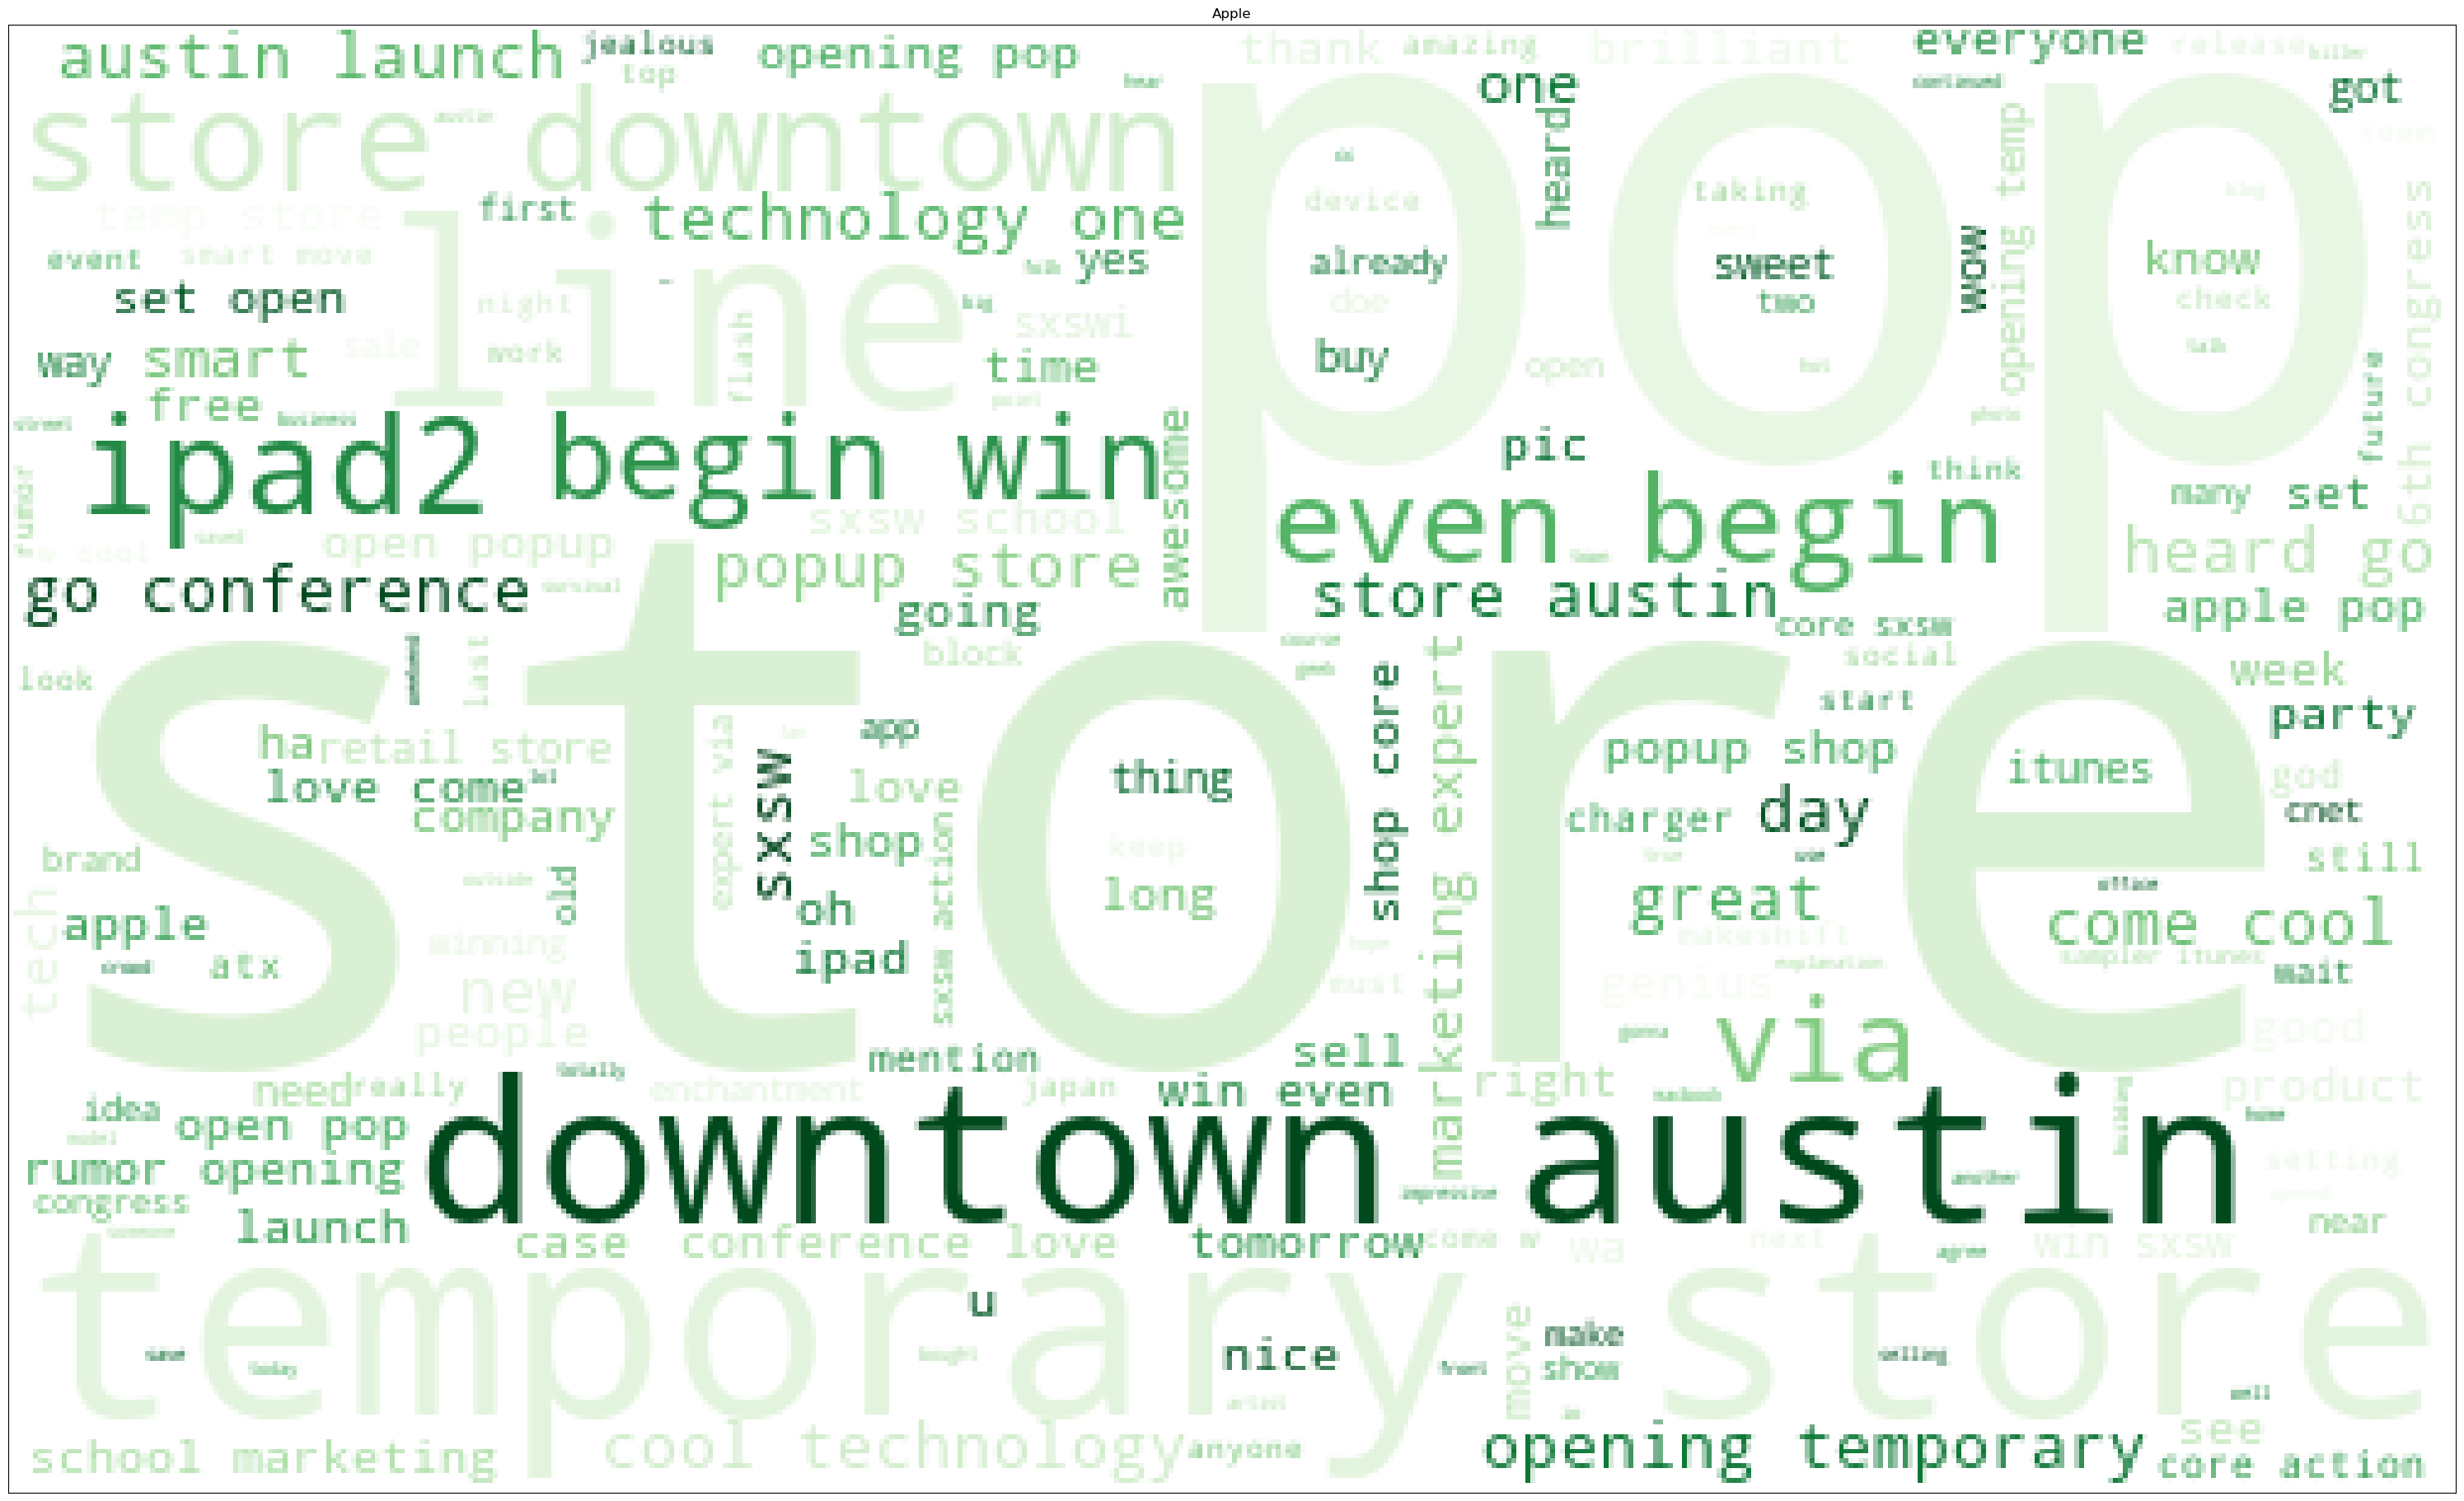

In [78]:
#call the function to generate word clouds for Apple and Positive
wordcloud_apple_pos = generate_product_wordcloud('Apple', 'Positive', stop_word_lst_no_brand)



Here we can tell that the temporary pop up store  seems to taken positively by the public.There also seems to be an excitement of the store at downtown Austin.We can see that people find the apple technology to be cool

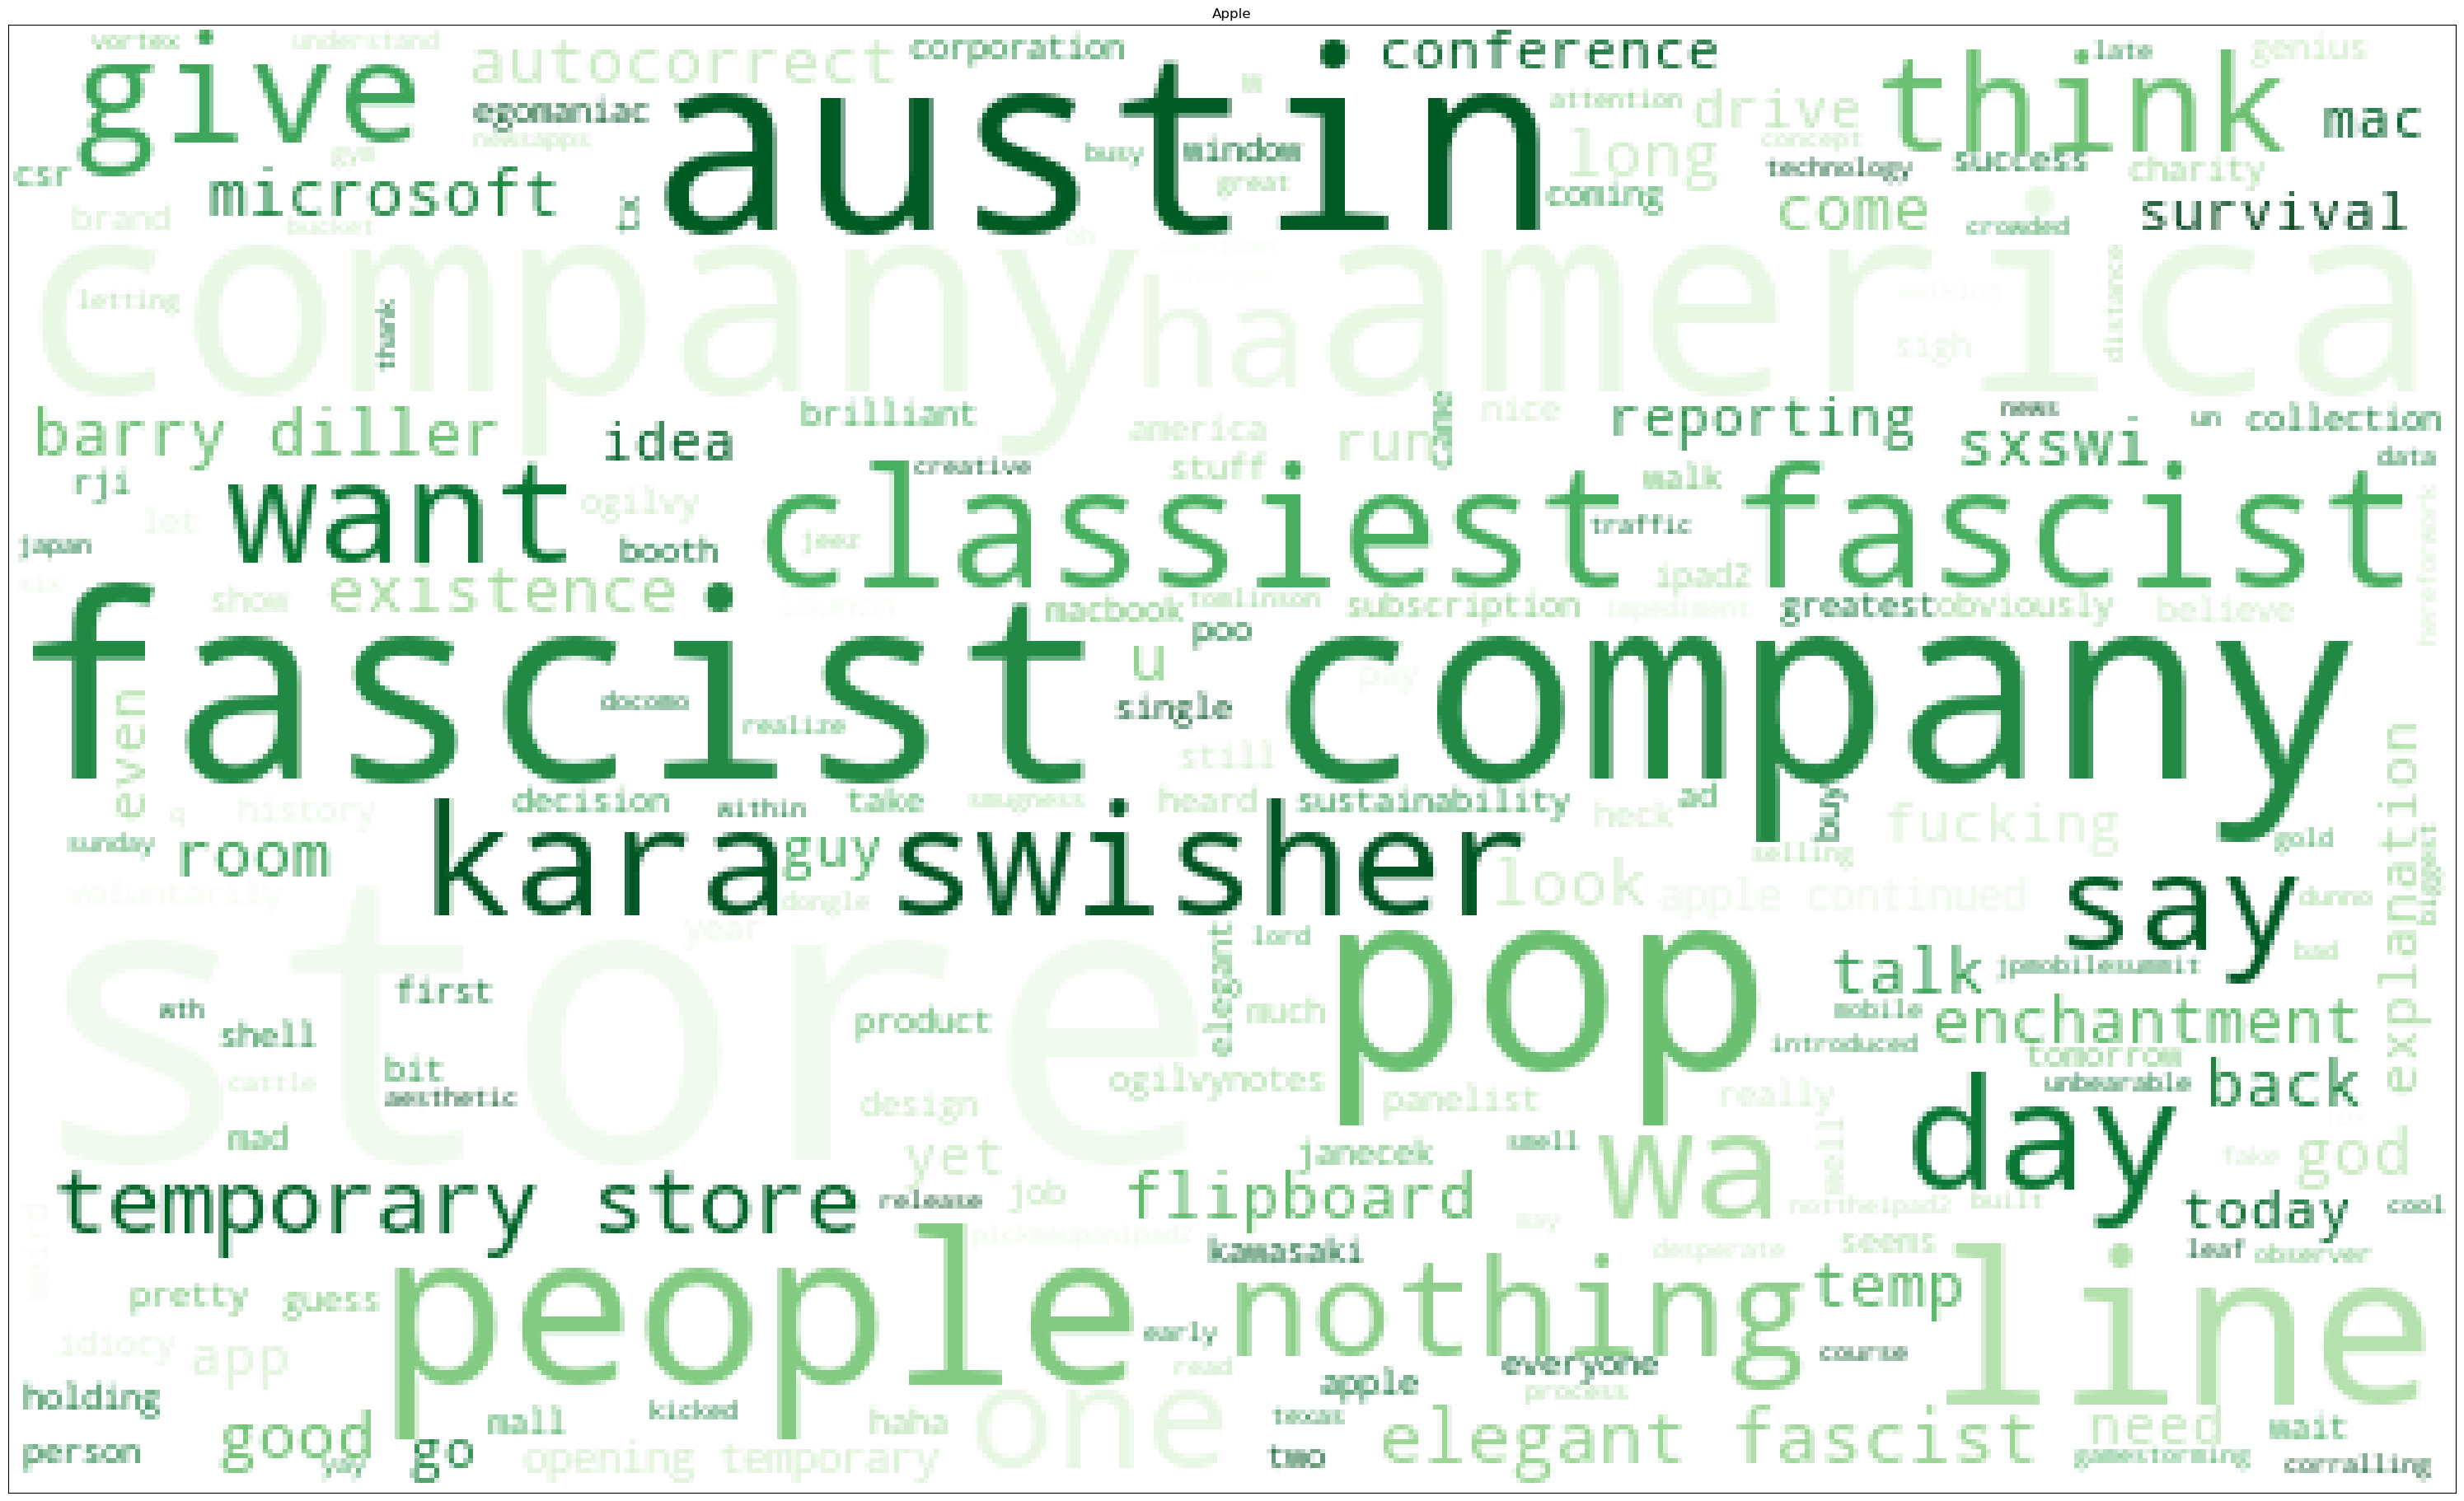

In [79]:
#negative sentiment for Apple word cloud
wordcloud_apple_neg, fig_apple_neg = generate_product_wordcloud('Apple',
                                                                'Negative',
                                                                stop_word_lst_no_brand,
                                                                colormap='Greens')

From the above negative tweets we can tell people are complaining about their brand being fascist

## Google Tweets

In [80]:
#filter to only Brand column equal to google
df_google = df[df['Brand']=='Google'] 
corpus_google = df_google['Tweet'].to_list()

In [81]:
#tokenize tweets
tokens_google = tokenize_tweets(corpus_google)
#lemmatize tweets
tokens_google_lemm = lemmatize_tokens(tokens_google)
#remove stopwords and punctuation using the same stop word list
tokens_google_ls = remove_stop(tokens_google_lemm, stop_list = stop_word_lst)

## Word cloud with Brand Information

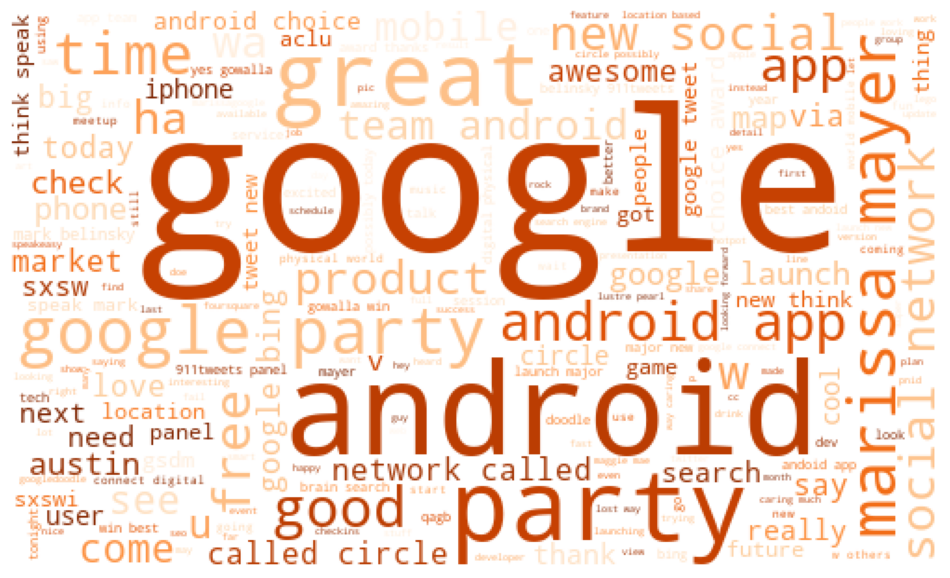

In [82]:
#generating word cloud
generate_wordcloud(tokens_google_ls, colormap='Oranges', collocations=True)

## Word Cloud Without Brand Information

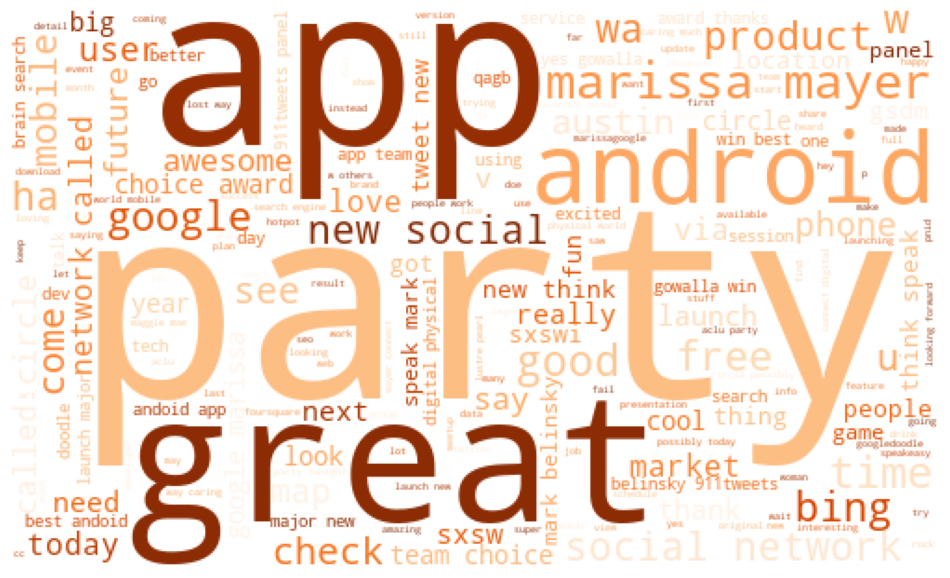

In [83]:
tokens_google_ls = remove_stop(tokens_google_ls, stop_list = stop_word_lst_no_brand)
generate_wordcloud(tokens_google_ls, colormap='Oranges', collocations=True)

## Positive, Negative and Neutral Percentage Sentiment of Google products

This will help give an overall picture of how the companies products are rated

In [84]:
df_google_sentiment = pd.DataFrame(df_google['Emotion'].value_counts(normalize=True)).reset_index()
df_google_sentiment.columns=['Emotion', 'Percentage']
display(df_google_sentiment)
df_google_sentiment.sort_values('Percentage', ascending=True, inplace=True)

Emotion  Percentage
0  Positive    0.827055
1  Negative    0.143836
2   Neutral    0.029110

Text(0.5, 1.0, 'Sentiment Percentages for Tweets about Google')

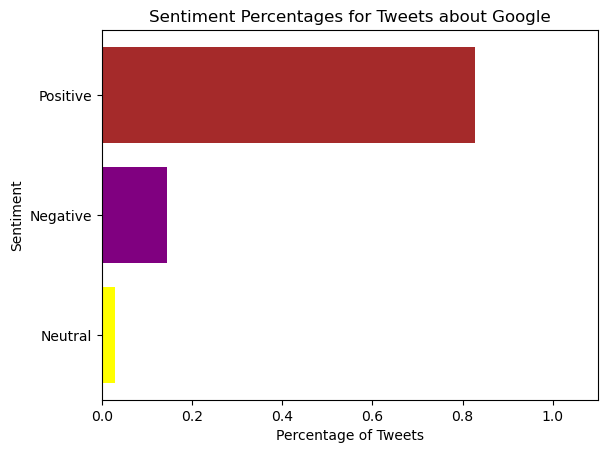

In [85]:
#Visualizing with a bar plot
fig, ax = plt.subplots()
ax.barh(df_google_sentiment['Emotion'], df_google_sentiment['Percentage'], 
        color=['Yellow', 'Purple', 'Brown'])
ax.set_xlim(0, 1.1)
ax.set_xlabel('Percentage of Tweets')
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment Percentages for Tweets about Google')

For better understanding we shall continue with our analysis to a more indepth level

## Sentiment Analysis on Google related Brand

### Positive Sentiment by Brand Type

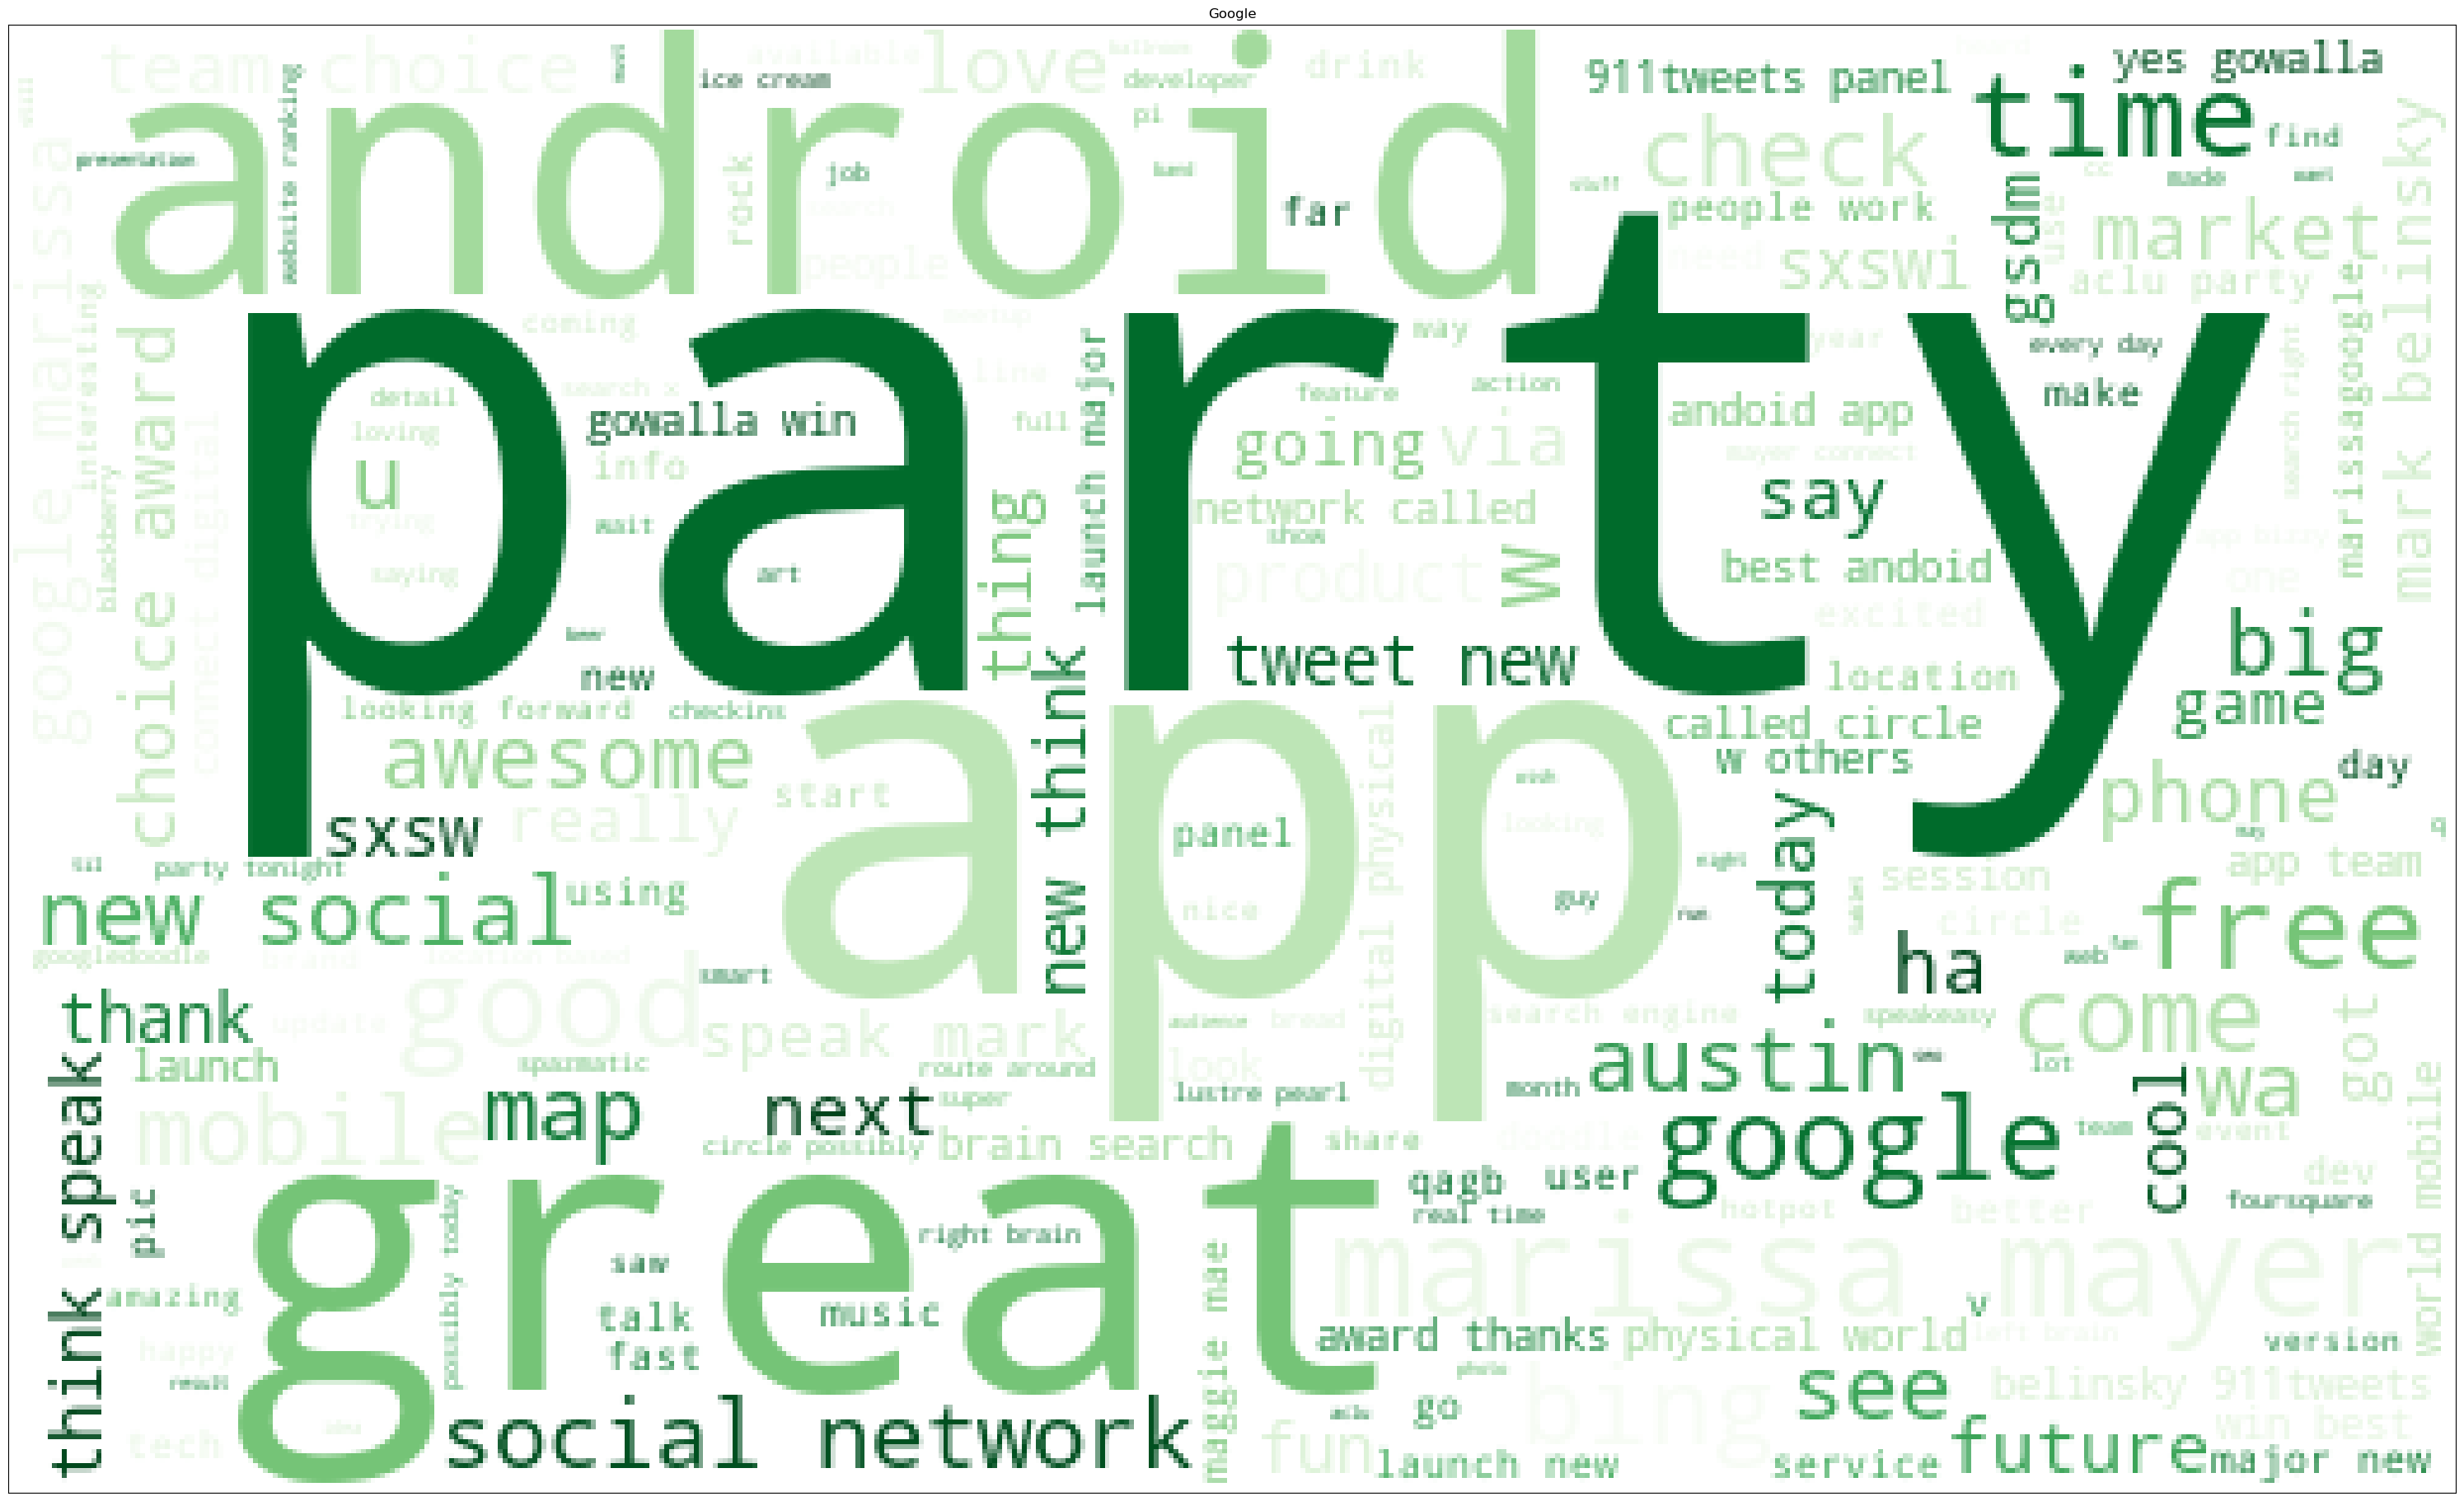

In [86]:
wordcloud_google_pos, fig_google_pos = generate_product_wordcloud('Google',
                                                                  'Positive',
                                                                  stop_word_lst_no_brand)

Basing on the above visualization we can tell that many people were excited about the party,people are also mentioning how great the android is.Additionally the words 'new social' along with Marissa Mayer created a lot of buzz around google's brand It may be good for Apple to look into this social network project and evaluate whether they would like to create a product as a competitor.Choice awards is also being mentioned and some free apps

##  Negative Sentiment by Brand Type

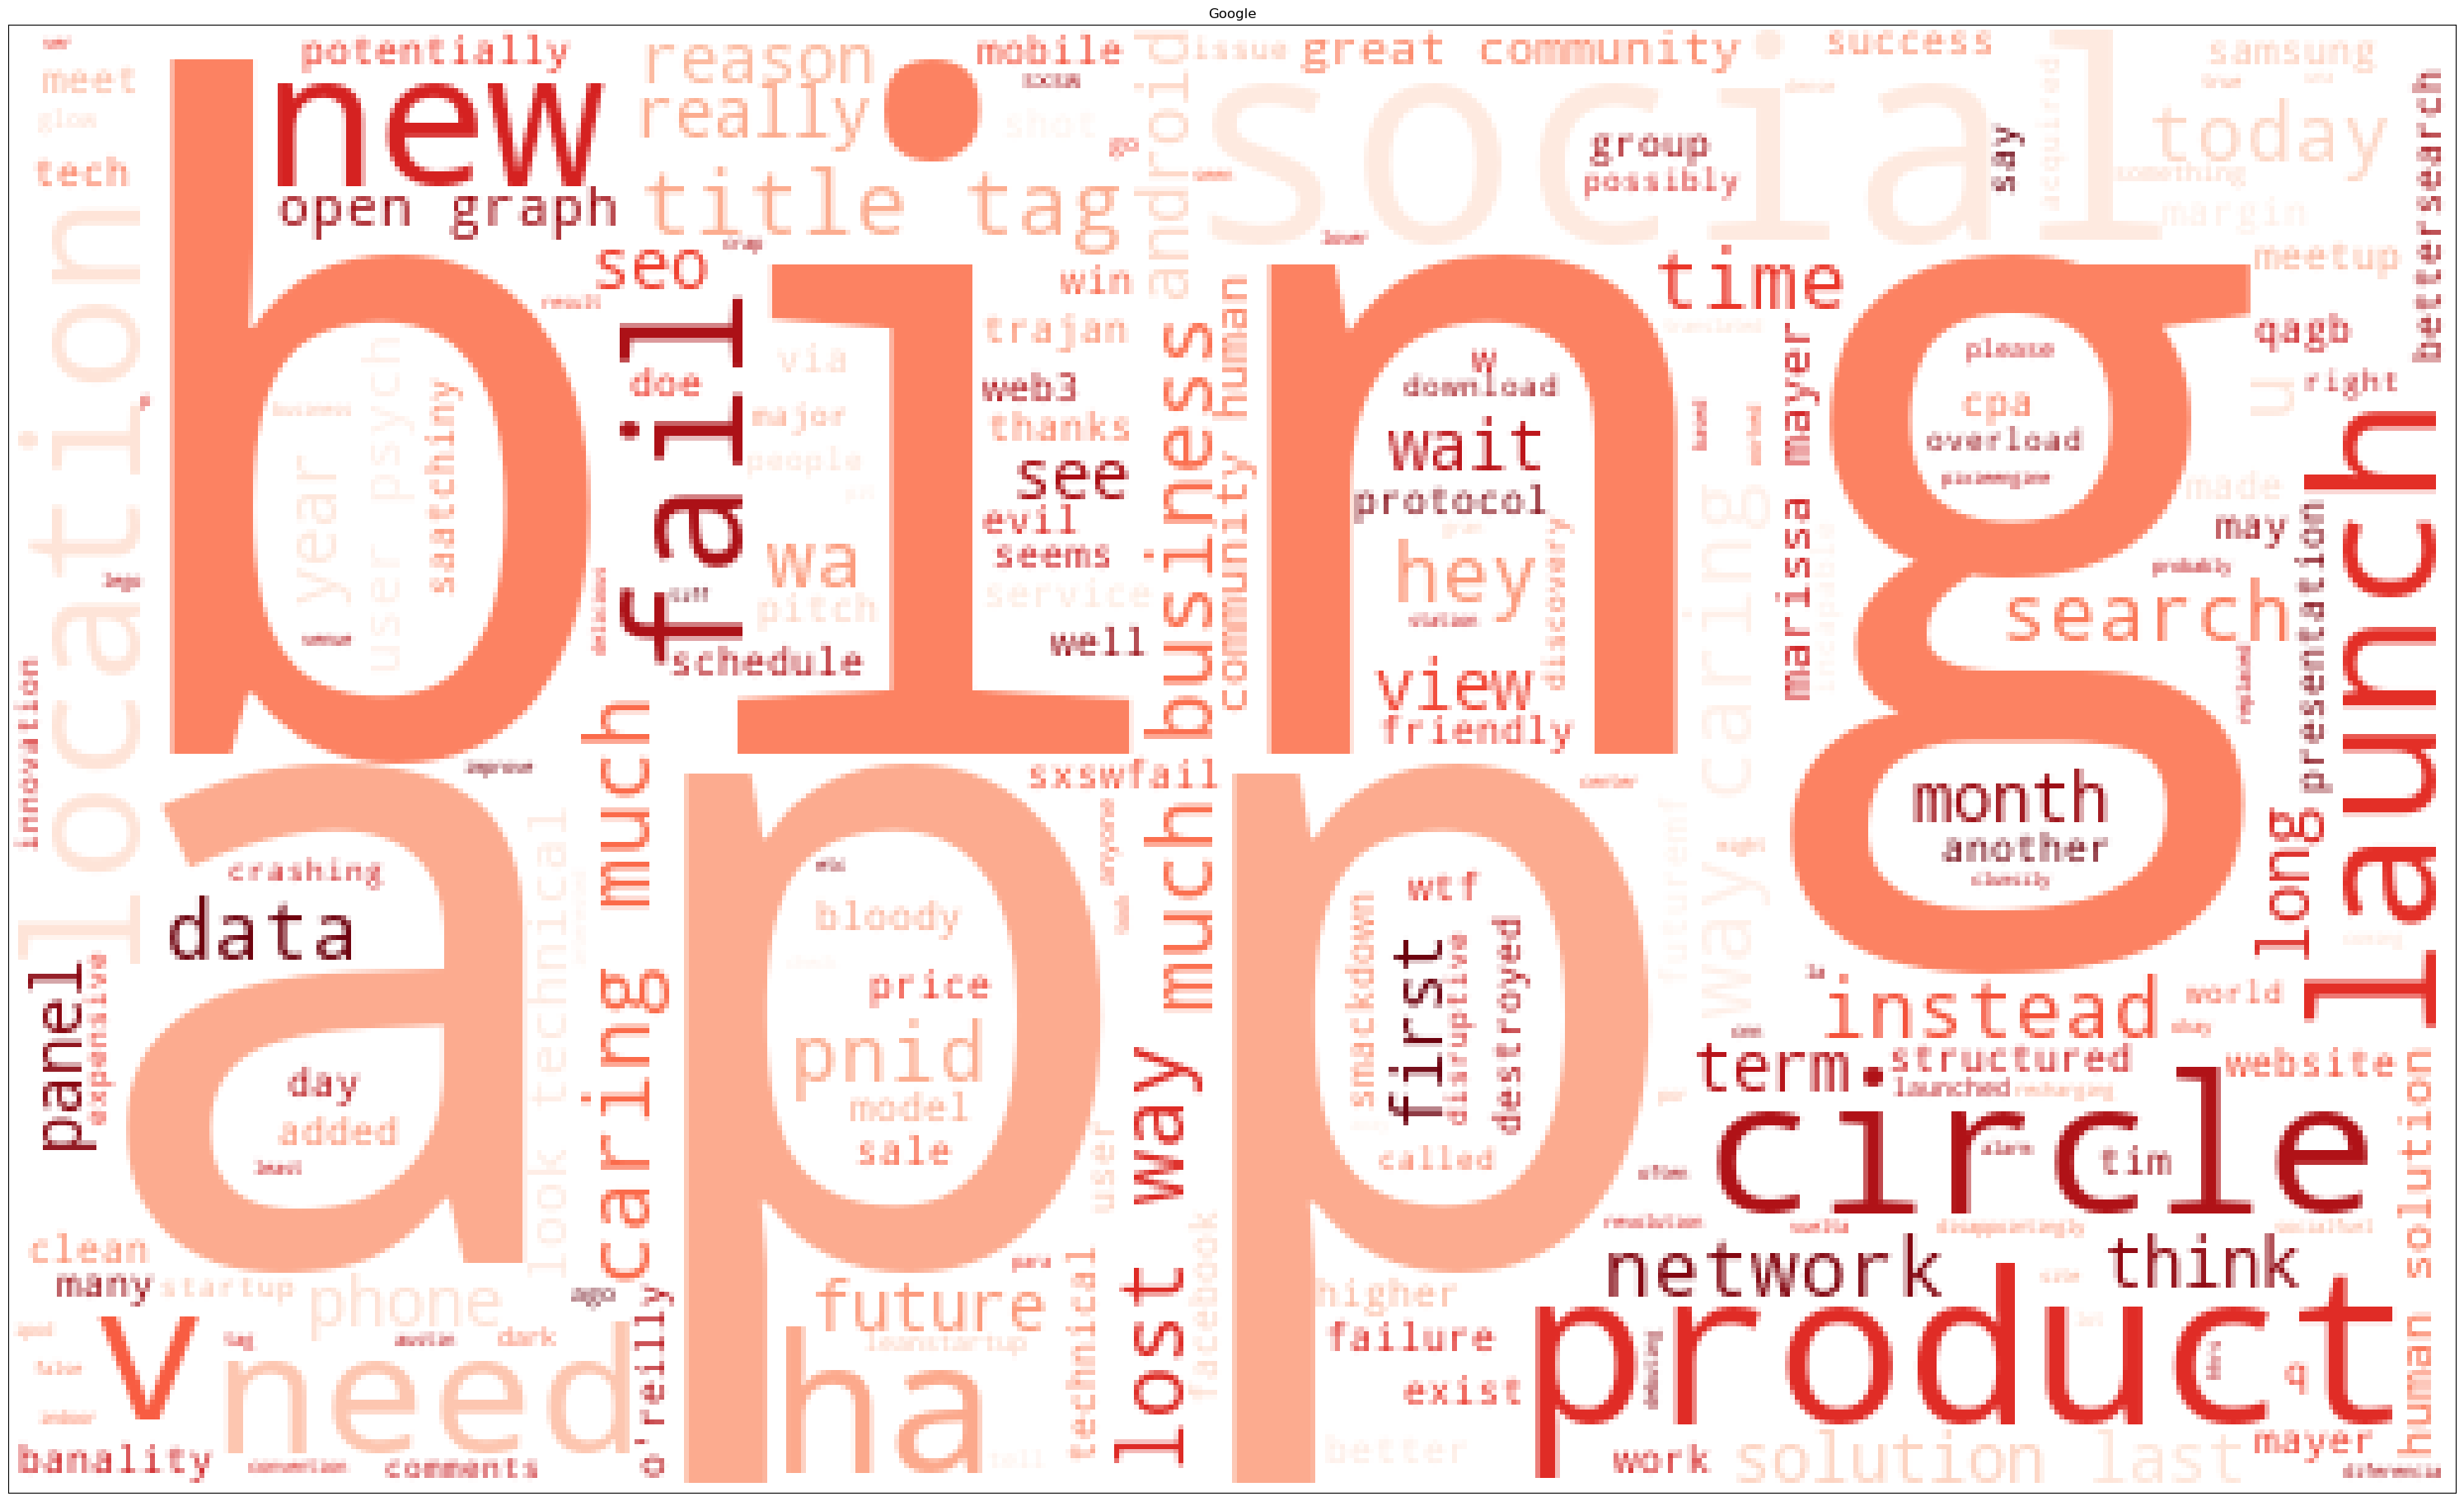

In [87]:
wordcloud_google_neg, fig_google_neg = generate_product_wordcloud('Google', 
                                                                  'Negative', 
                                                                  stop_word_lst_no_brand, 
                                                                  colormap='Reds')

We can see that Microsoft's Bing is mentioned frequently.Social network mentioned in the positive tweet is also in the negative as well.Comments like fail,dark are also being used

# STEP 6:MODELING

We've seen how that is possible to use tweets learn more about people's opinion on different products and determine whether it is a positive negative or neutral sentiment.We are going to use a Machine Learning model to automatically classify tweets based on the words used
We will break it down to two problems that is:Binary and Multiclass.
Binary will be used to predict whether a tweet is 'Positive' or 'Negatuve'.With Multicalss Classification we will add 'Neutral' category to have a three way classification.


## Binary Classification

### Data Preparation

In [88]:
#importing the relevant libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay


### Functionizing Evaluation of Classification Models


In [103]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import RocCurveDisplay
# def classification(y_true, y_pred, X_test, X_train, clf):
#     """This function shows the classification report,
#     the confusion matrix as well as the ROC curve for evaluation of model quality.
#     -----------------------------------
#     Arguments:
#     y_true: Correct y values, typically y_test that comes from the 
#     train_test_split performed at the beginning of model development.
#     y_pred: Predicted y values by the model.
#     clf: classifier model that was fit to training data.
#     X_test: X_test values from train_test_split
#     X_train: X_train values from train_test_split"""
    
#     #training and test scores
#     print(f"Training Score: {round(clf.score(X_train, y_train),2)} \
#             Test Score:{round(clf.score(X_test, y_true),2)}")
    
#     #Classification report
#     print("\n")
#     print("CLASSIFICATION REPORT")
#     print("------------------------------------------")
#     print(classification_report(y_true=y_true, y_pred=y_pred))
    
#     #Creating a figure/axes for confusion matrix and ROC curve
#     fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    
#     #Plotting the normalized confusion matrix
#     ConfusionMatrixDisplay(estimator=clf, X=X_test, y_true=y_true, cmap='Blues', 
#                           normalize='true', ax=ax[0], 
#                           display_labels=['Negative', 'Positive'])
    
#     #Plotting the ROC curve
#     RocCurveDisplay(estimator=clf, X=X_test, y=y_true, ax=ax[1])
    
#     #Plotting the 50-50 guessing plot for reference
#     ax[1].plot([0,1], [0,1], ls='--', color='orange')
from sklearn.metrics import confusion_matrix
def classification(y_true, y_pred, X_test, X_train, clf):
    # Training and test scores
    print(f"Training Score: {round(clf.score(X_train, y_train),2)} \
            Test Score:{round(clf.score(X_test, y_true),2)}")
    
    # Classification report
    print("\n")
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    # Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plotting the normalized confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive']).plot(ax=ax[0])
    
    # Plotting the ROC curve
    RocCurveDisplay.from_estimator(clf, X_test, y_true, ax=ax[1])
    
    # Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')

### Parsing Data to a new Dataframe

Since we will start by developing a model for binary classification,we need to remove neutral emotions from our tweets and make binary our target column which is the 'Emotion' column.

In [90]:
#removing neutral tweets for binary classification
df_binary = df[df['Emotion']!='Neutral']
#verifying that neutral tweets have been removed
df_binary['Emotion'].unique()

array(['Negative', 'Positive'], dtype=object)

In [91]:
#making emotion column binary
emotion_dict = {'Negative': 0, 'Positive': 1}
df_binary['Emotion'] = df_binary['Emotion'].map(emotion_dict)

C:\Users\USER\AppData\Local\Temp\ipykernel_8456\3053032294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['Emotion'] = df_binary['Emotion'].map(emotion_dict)


### Performing train_test_split

In [92]:
#train_test_split the dataset
y = df_binary['Emotion']
X = df_binary['Tweet']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Dummy Classifier 
### Baseline model


To evaluate our model performances and truly asses how well they are performing compared to random guessing we will build a dummy classifier as our baseline.

### Vanilla Dummy Model

In [93]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True)

c:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Score: 0.84             Test Score:0.85


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.85      1.00      0.92       751

    accuracy                           0.85       885
   macro avg       0.42      0.50      0.46       885
weighted avg       0.72      0.85      0.78       885



c:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


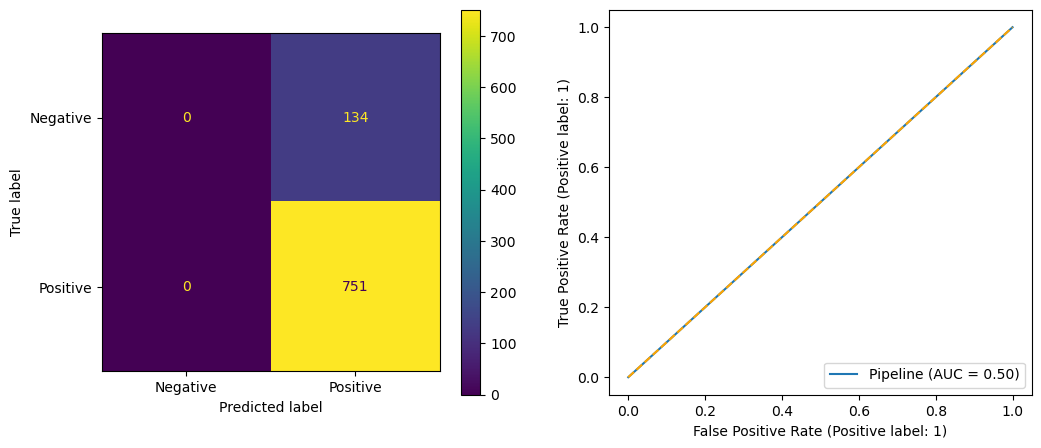

In [104]:
from sklearn.dummy import DummyClassifier

clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_word_lst)),
                     ('clf', DummyClassifier(random_state=42))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)